<a href="https://colab.research.google.com/github/lakshmip04/DATASCIENCE/blob/main/Natural_Disaster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Certificate-Workshop-lakshmi priya.pdf'		    'Untitled document (1).gdoc'
'Colab Notebooks'					    'Untitled document.gdoc'
'Copy of LabSessionData.xlsx'				    'Untitled form (1).gform'
'Lakshmi_Priya_Resume_ _.pdf'				    'Untitled form (2).gform'
 LakshmiPriya_Resume.pdf				    'Untitled form (3).gform'
'ml project NID.gdoc'					    'Untitled form.gform'
'Prevention of SDN Route Manipulation Attack.gdoc'	    'Untitled form (Responses) (1).gsheet'
'Receipt pay_OlCdMSW3u0OXdL from NEXT CHAPTER  (Paid).pdf'  'Untitled form (Responses).gsheet'
 SDN.gdoc						     YLS_LakshmiPriya.gdoc


In [12]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/FDS/1970.xlsx')
df

,Date,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,...,End Year,End Month,End Day,Total Deaths,No. Affected,Total Affected,CPI,Admin Units,Entry Date,Last Update
0,1970-01-01,2000-0020-IND,No,nat-met-ext-col,Natural,Meteorological,3,Cold wave,IND,India,...,2000,1,1,275.000000,5.141636e+06,3.935890e+06,56.514291,"[{""adm1_code"":1511,""adm1_name"":""West Bengal""},...",2003-07-01,2023-09-25
1,1970-01-01,2000-0306-IND,No,nat-bio-epi-vir,Natural,Biological,2,Viral disease,IND,India,...,2000,5,1,84.000000,1.055000e+03,1.055000e+03,56.514291,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2003-07-01,2023-09-25
2,1970-01-01,2000-0308-IND,No,nat-bio-epi-bac,Natural,Biological,2,Bacterial disease,IND,India,...,2000,5,1,240.103448,1.920000e+02,1.920000e+02,56.514291,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2003-07-01,2023-09-25
3,1970-01-01,2000-0323-IND,No,nat-met-sto-tro,Natural,Meteorological,8,Tropical cyclone,IND,India,...,2000,10,17,240.103448,5.141636e+06,3.935890e+06,56.514291,"[{""adm1_code"":1485,""adm1_name"":""Andhra Pradesh""}]",2003-07-01,2023-09-25
4,1970-01-01,2000-0332-IND,No,nat-hyd-flo-fla,Natural,Hydrological,4,Flash flood,IND,India,...,2000,6,10,20.000000,3.000000e+06,3.000000e+06,56.514291,"[{""adm2_code"":17582,""adm2_name"":""Golaghat""},{""...",2005-09-15,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1970-01-01,2024-0399-IND,No,nat-hyd-flo-fla,Natural,Hydrological,4,Flash flood,IND,India,...,2024,7,8,48.000000,2.100000e+06,2.100000e+06,73.203269,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2024-06-21,2024-07-18
405,1970-01-01,2024-0481-IND,No,nat-hyd-flo-flo,Natural,Hydrological,4,Flood (General),IND,India,...,2024,7,9,125.000000,1.000000e+06,1.000020e+06,73.203269,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2024-07-15,2024-07-23
406,1970-01-01,2024-0561-IND,No,nat-hyd-flo-flo,Natural,Hydrological,4,Flood (General),IND,India,...,2024,8,23,46.000000,5.141636e+06,3.935890e+06,73.203269,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2024-08-01,2024-08-23
407,1970-01-01,2024-0624-IND,No,nat-hyd-flo-fla,Natural,Hydrological,4,Flash flood,IND,India,...,2024,8,19,11.000000,3.400000e+04,3.400000e+04,73.203269,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2024-08-23,2024-08-23


In [13]:
missing_values = df.isnull().sum()
print(missing_values)

Date                  0
DisNo.                0
Historic              0
Classification Key    0
Disaster Group        0
Disaster Subgroup     0
Disaster Type         0
Disaster Subtype      0
ISO                   0
Country               0
Subregion             0
Region                0
Location              0
OFDA/BHA Response     0
Appeal                0
Declaration           0
Magnitude             0
Magnitude Scale       0
Latitude              0
Longitude             0
Start Year            0
Start Month           0
Start Day             0
End Year              0
End Month             0
End Day               0
Total Deaths          0
No. Affected          0
Total Affected        0
CPI                   0
Admin Units           0
Entry Date            0
Last Update           0
dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

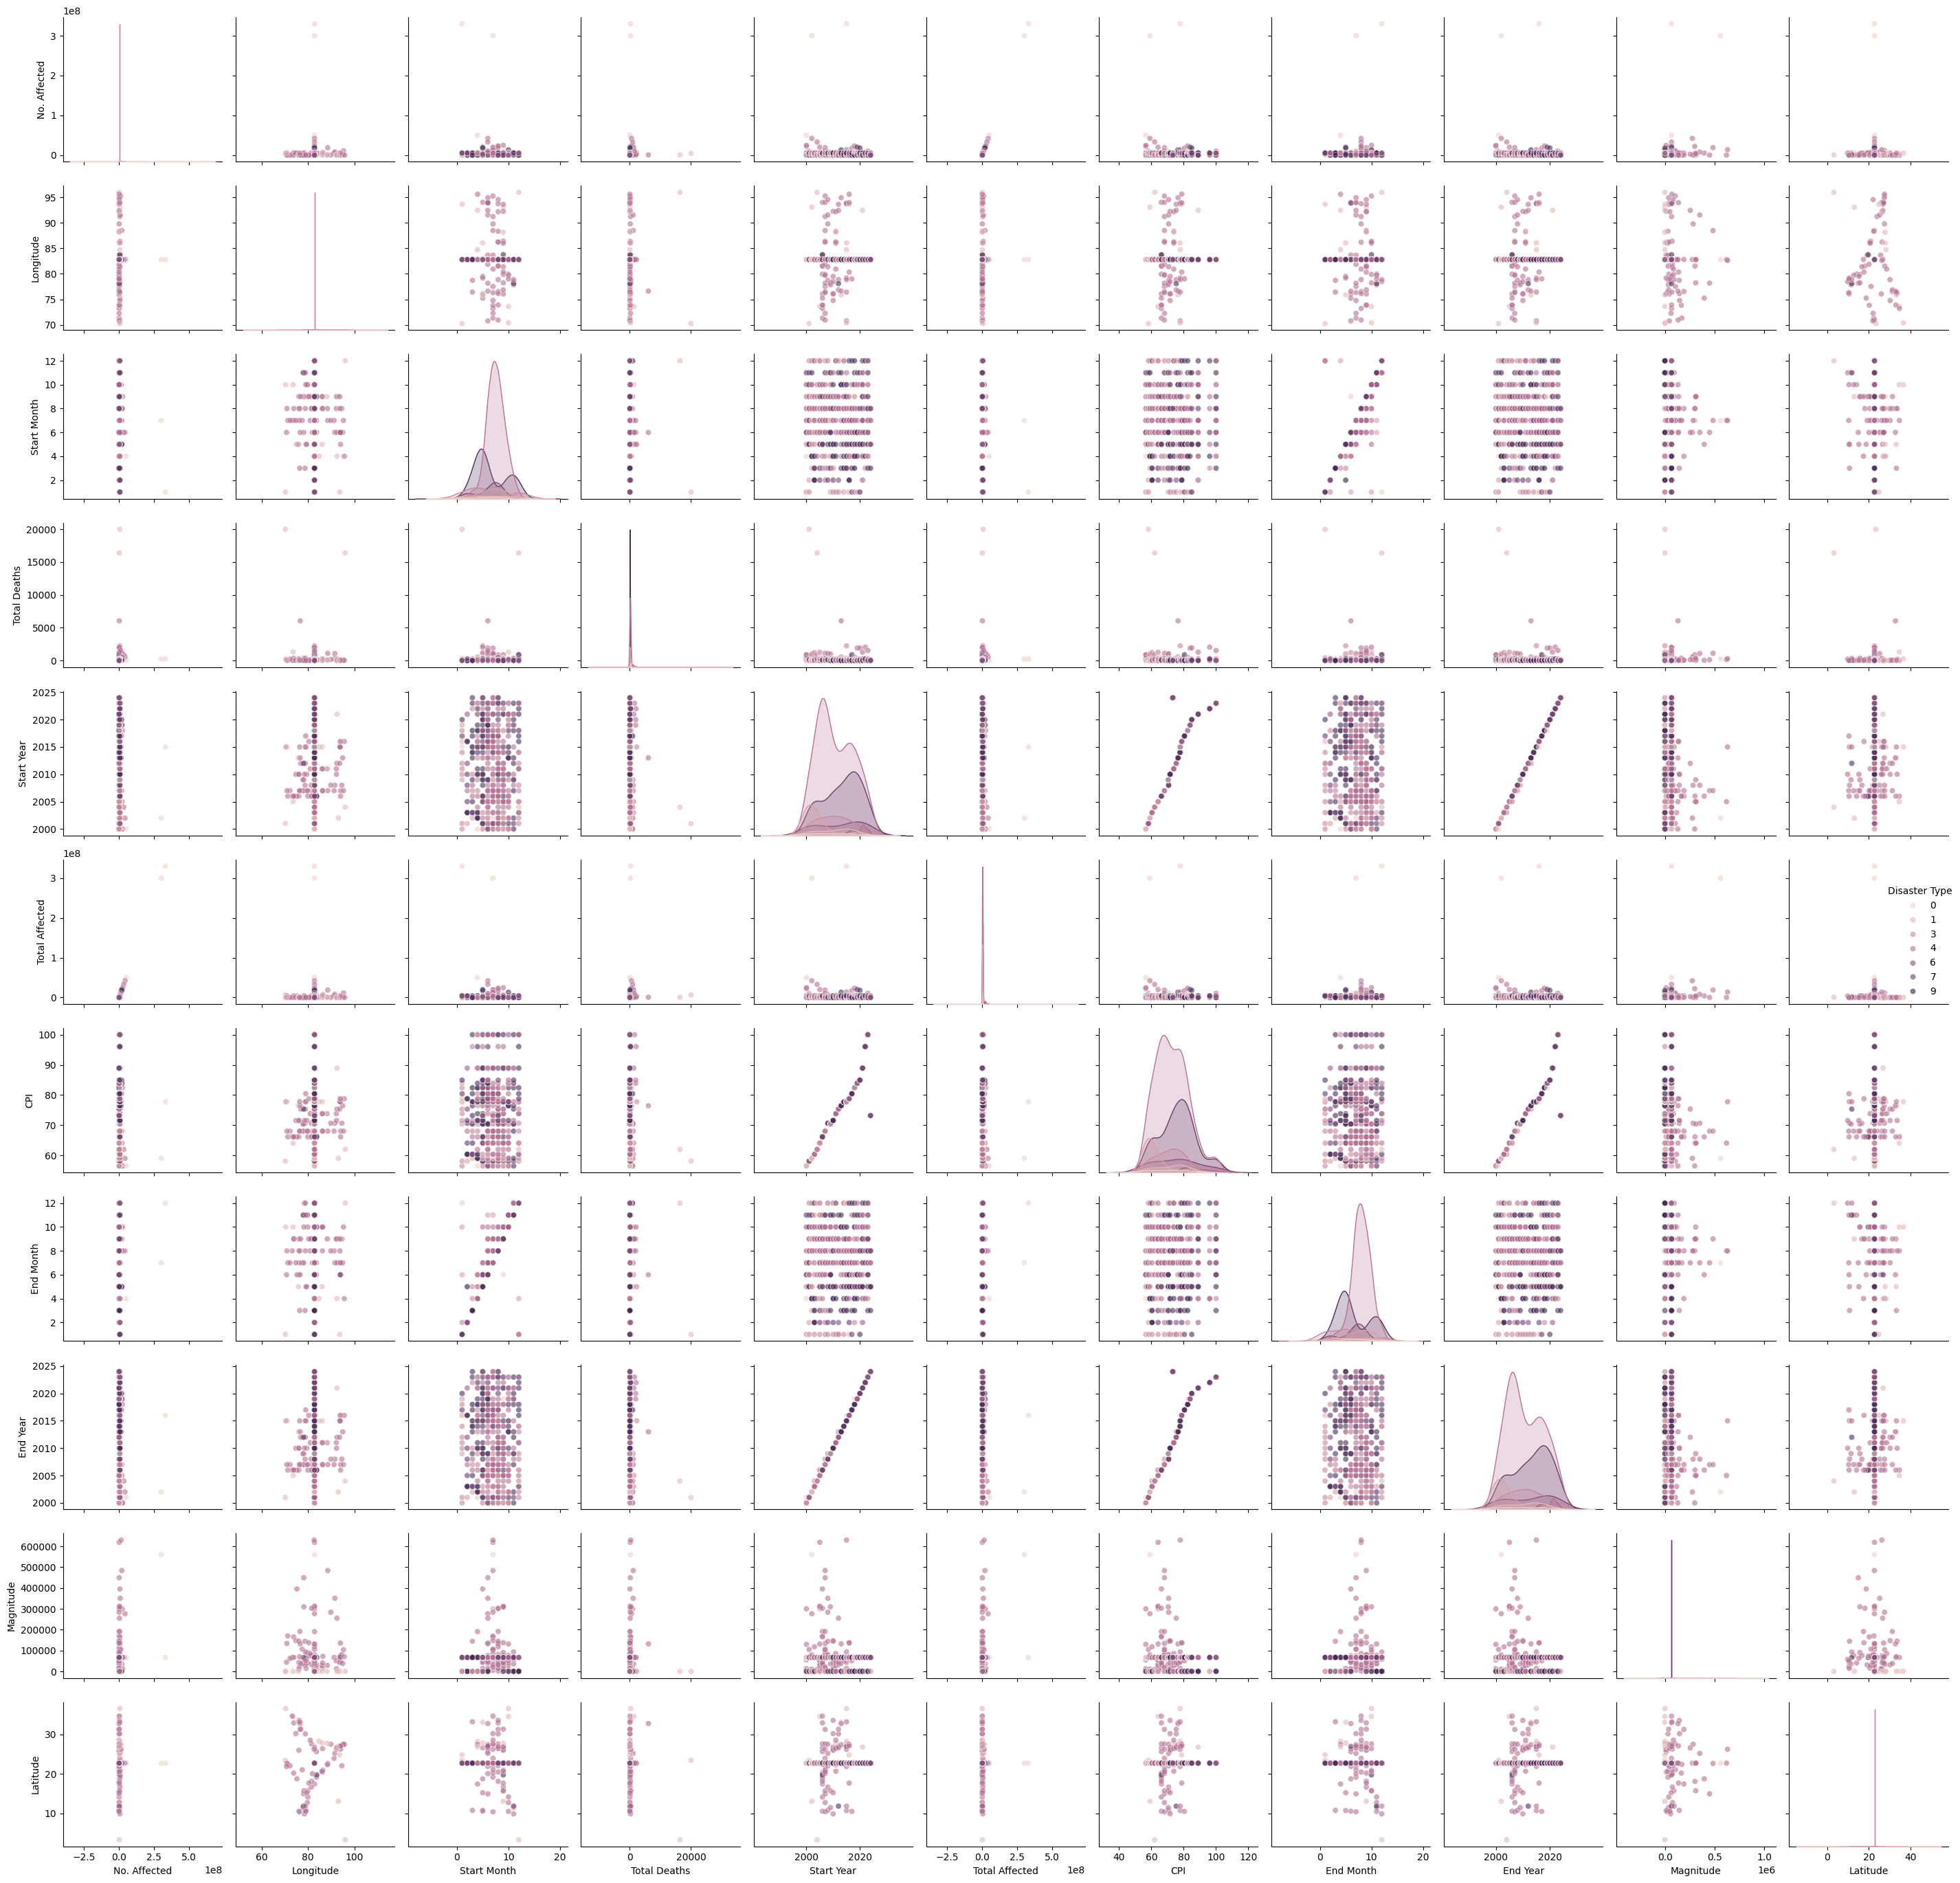

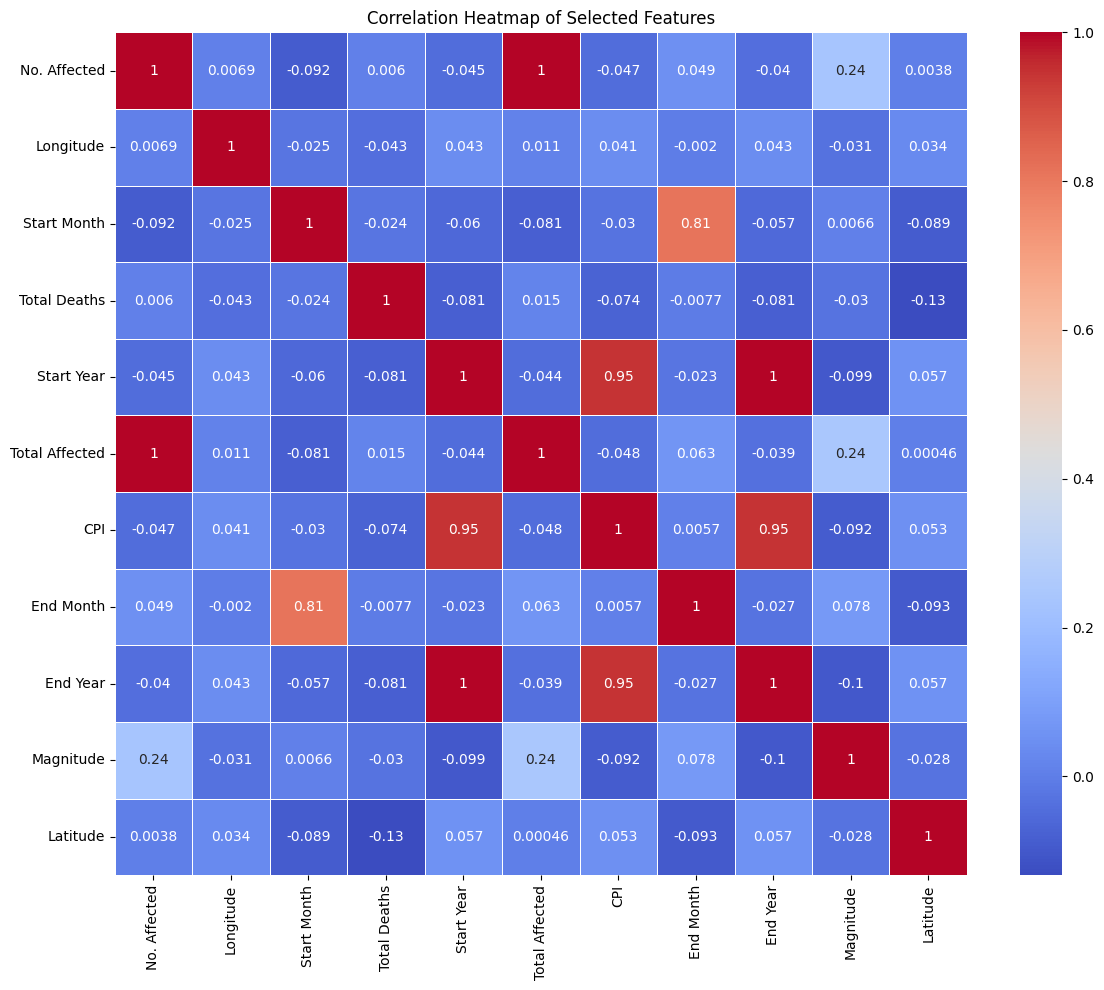

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


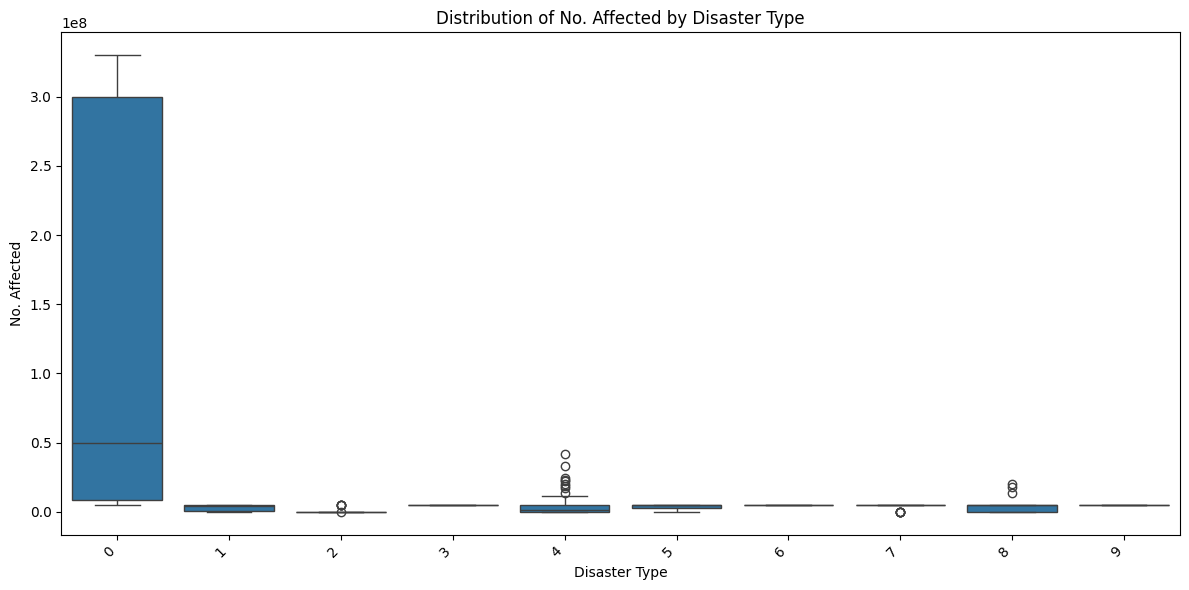

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


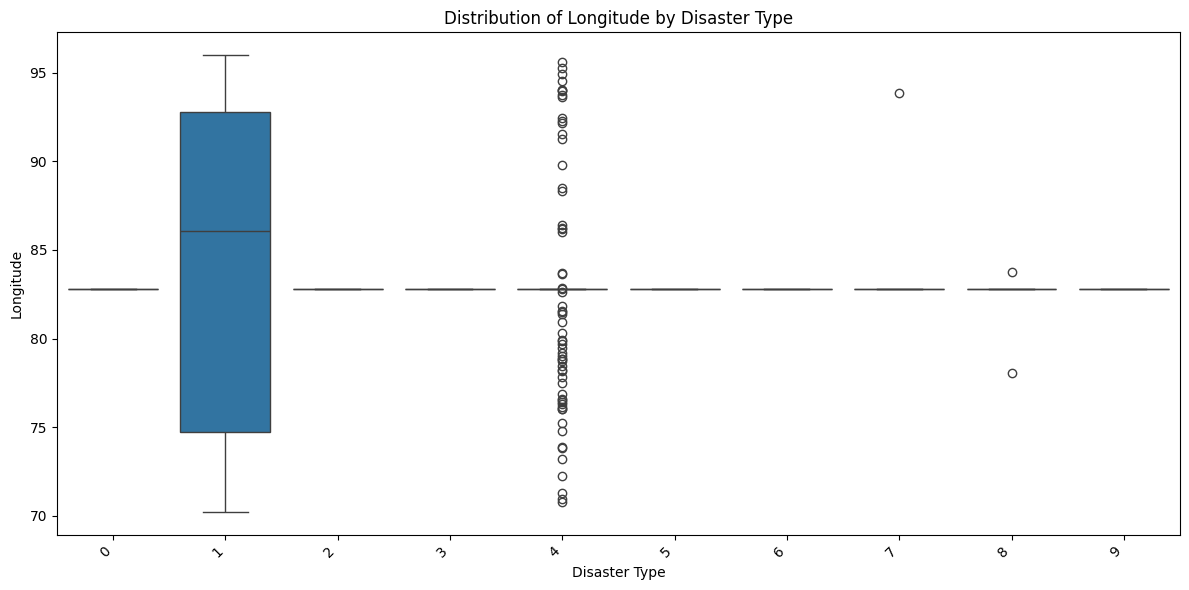

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


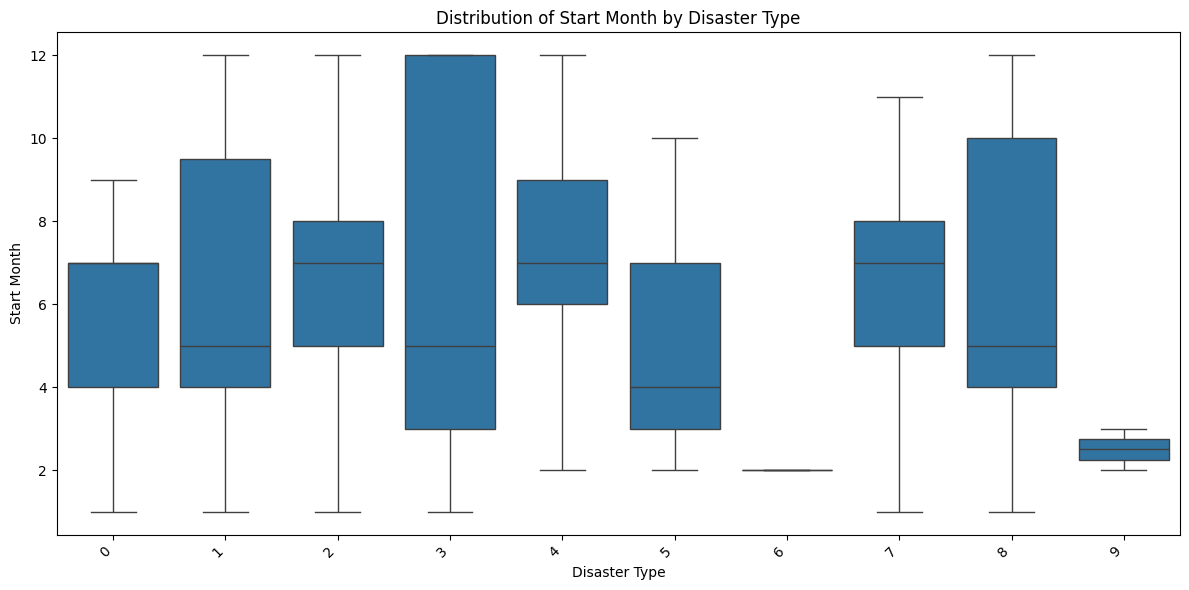

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


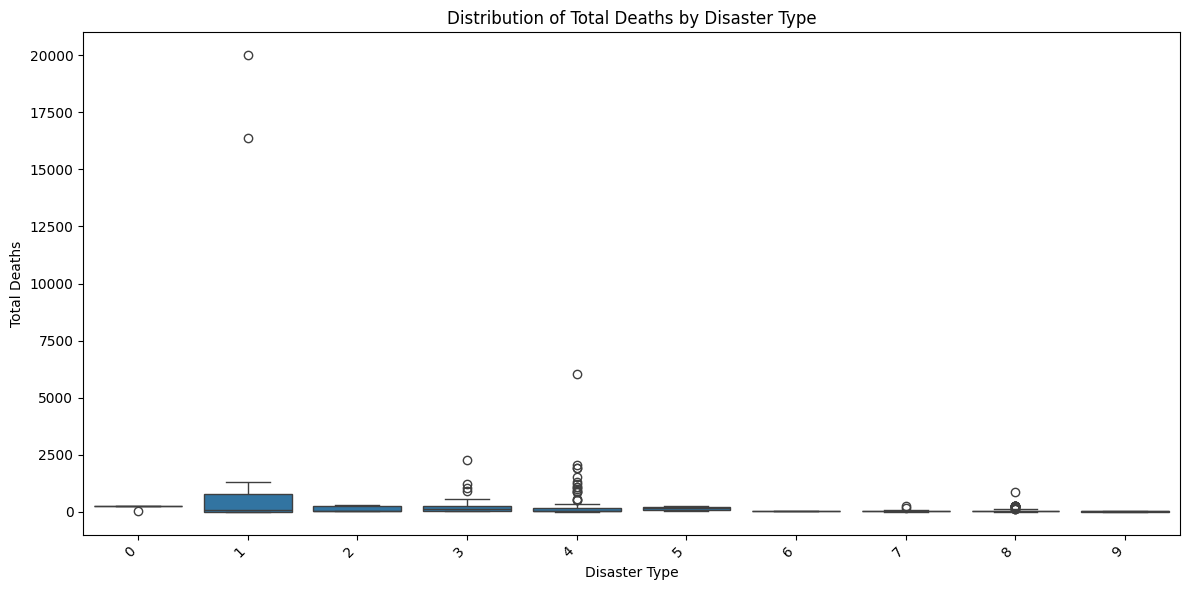

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


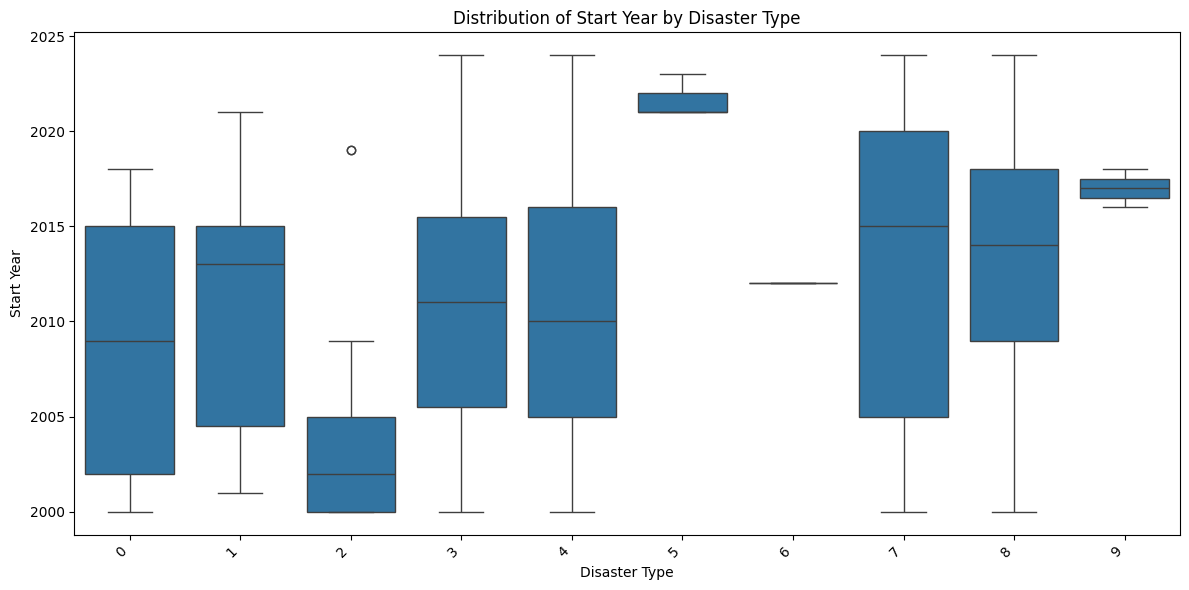

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


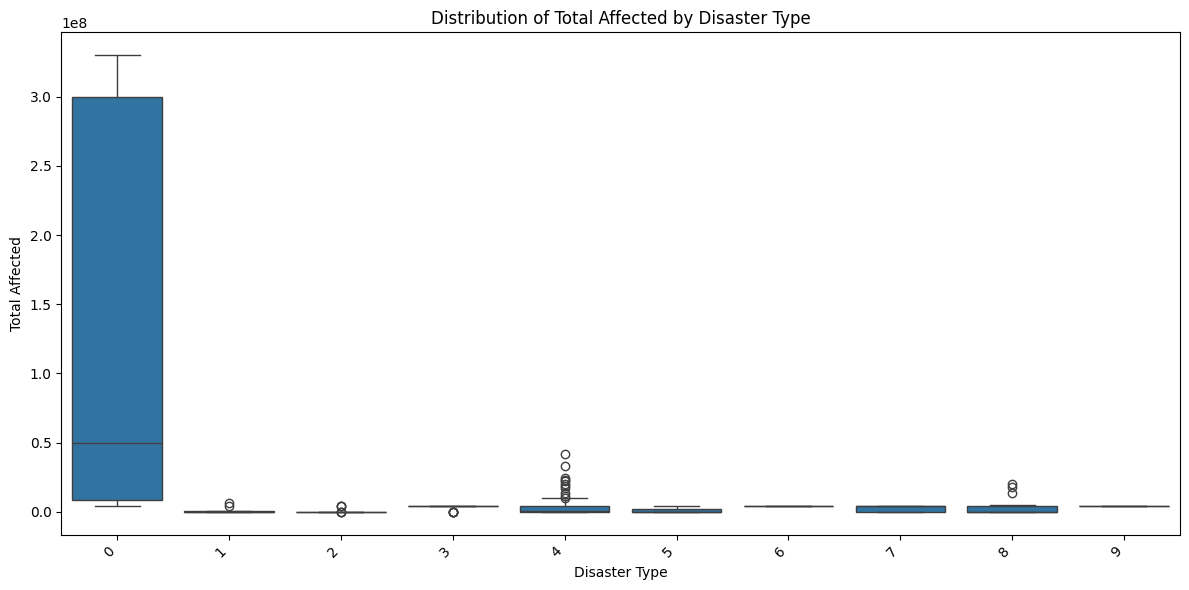

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


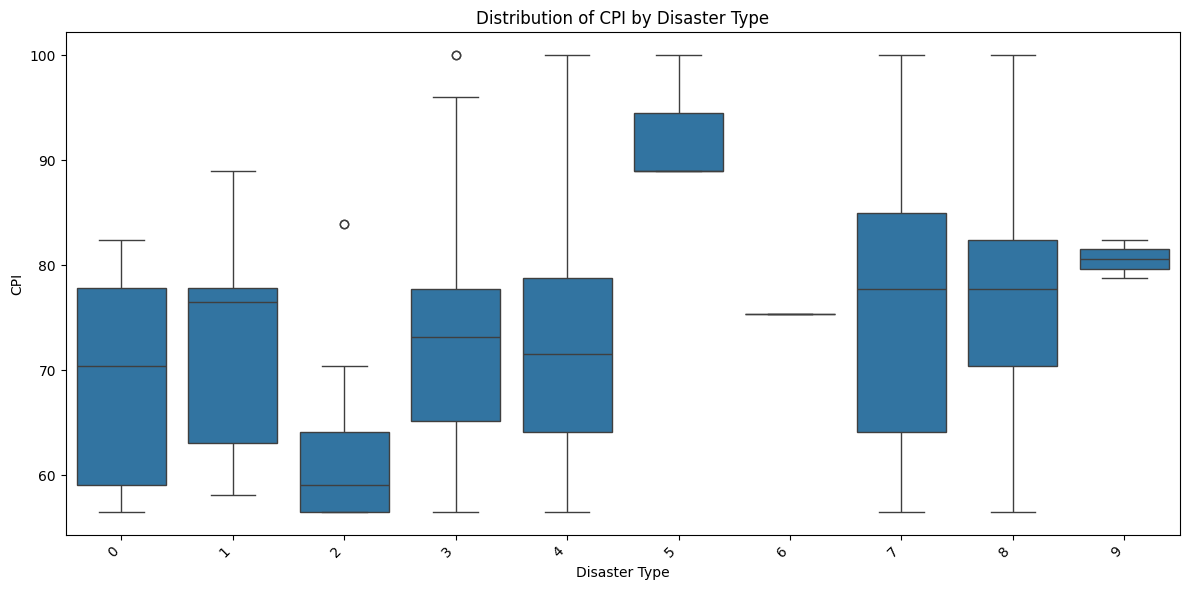

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


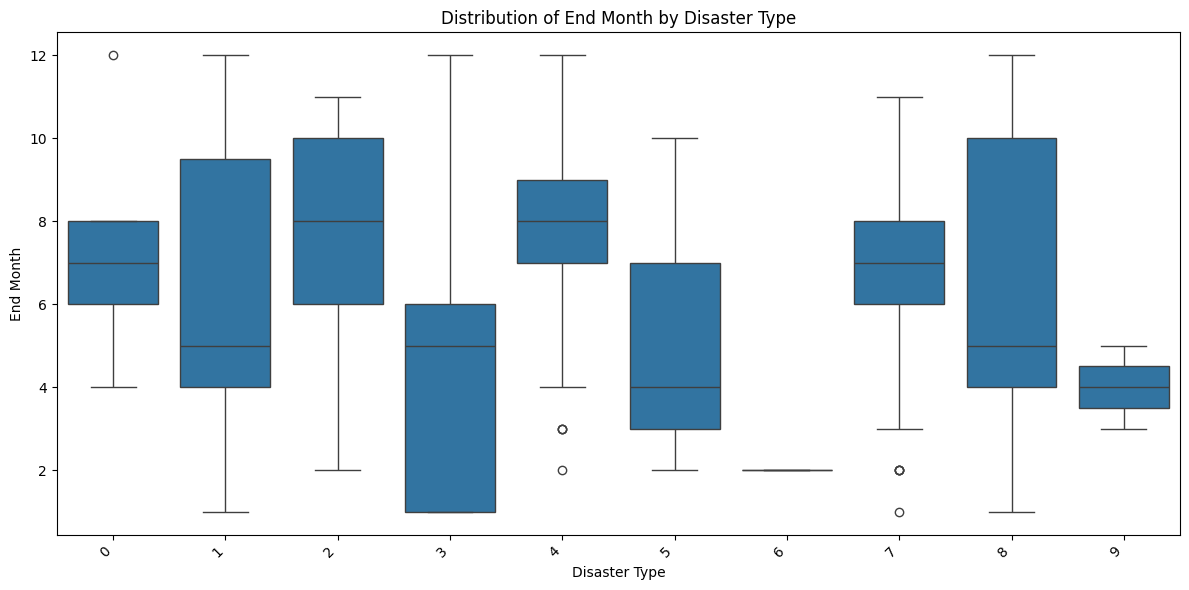

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


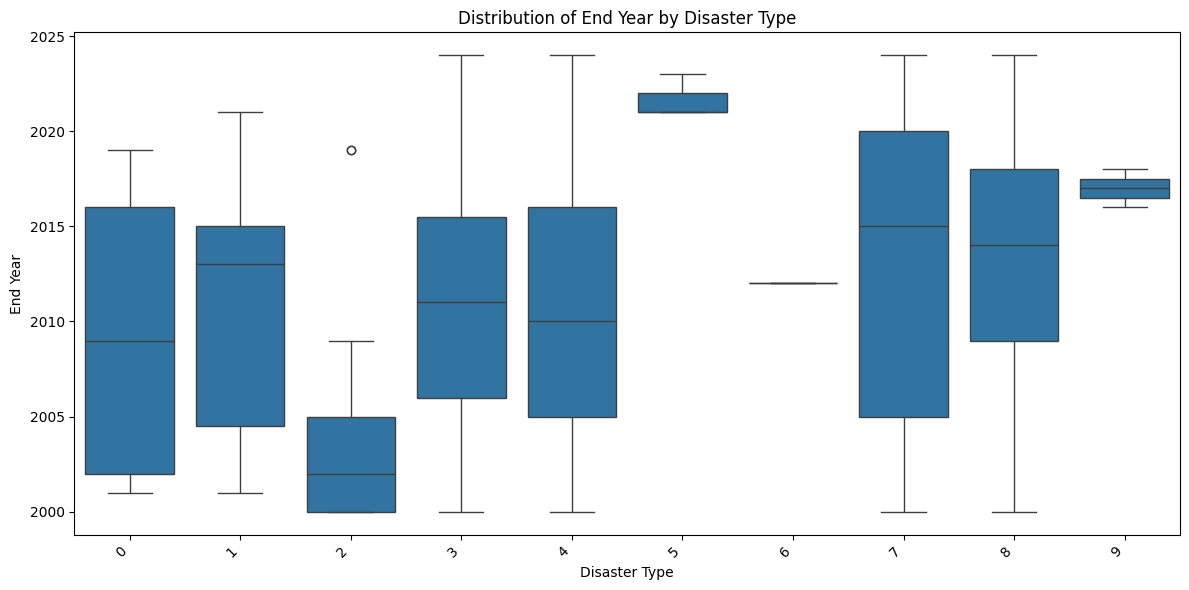

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


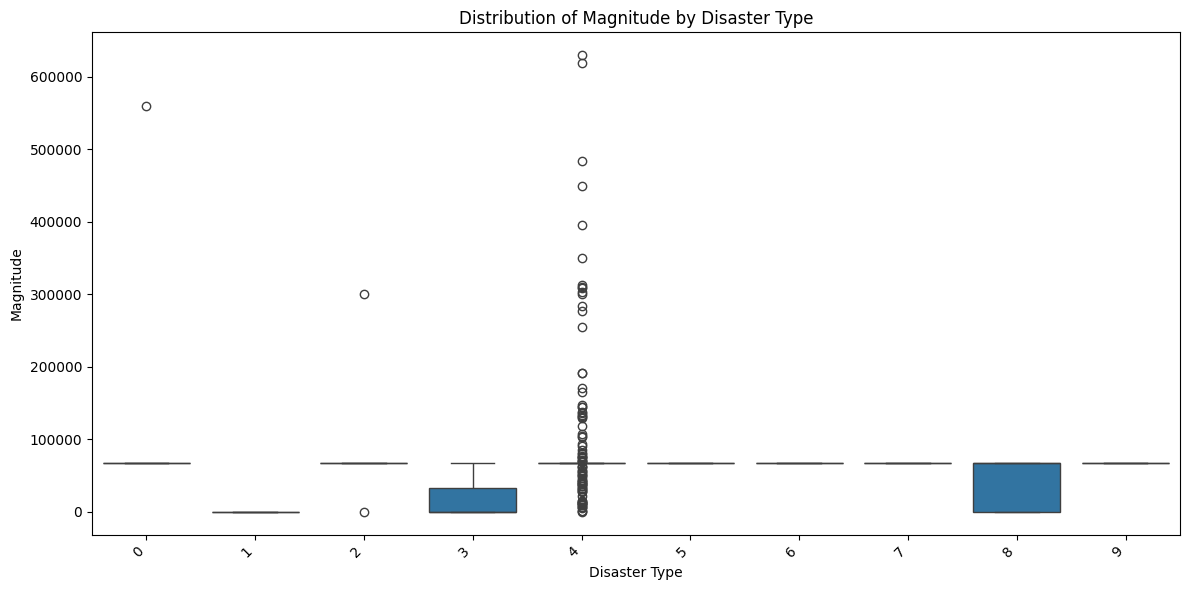

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


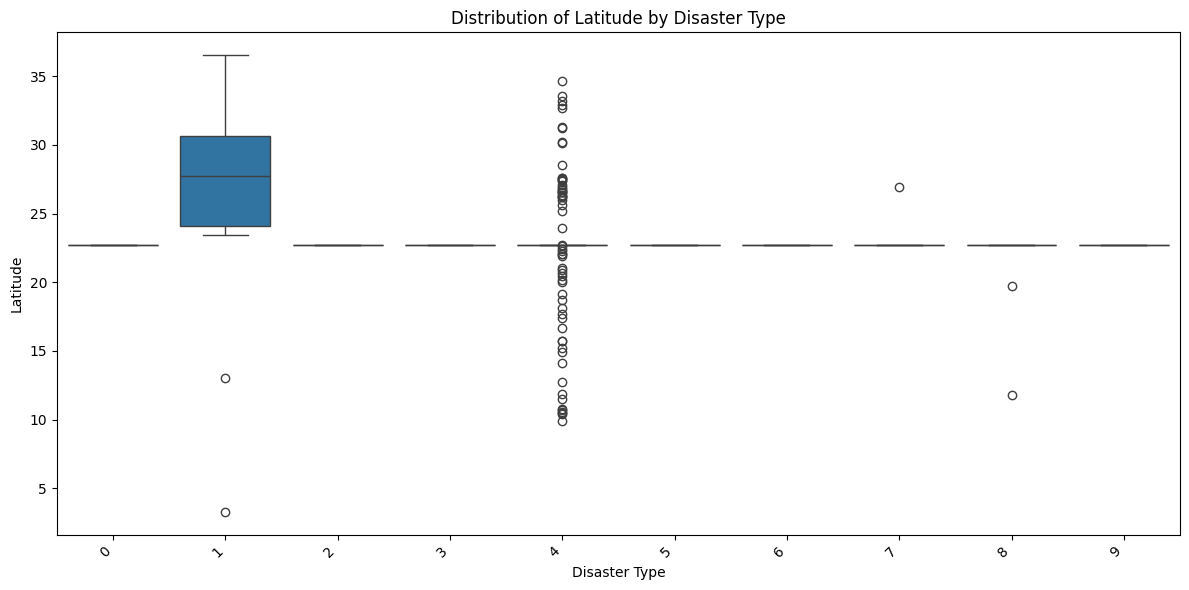

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

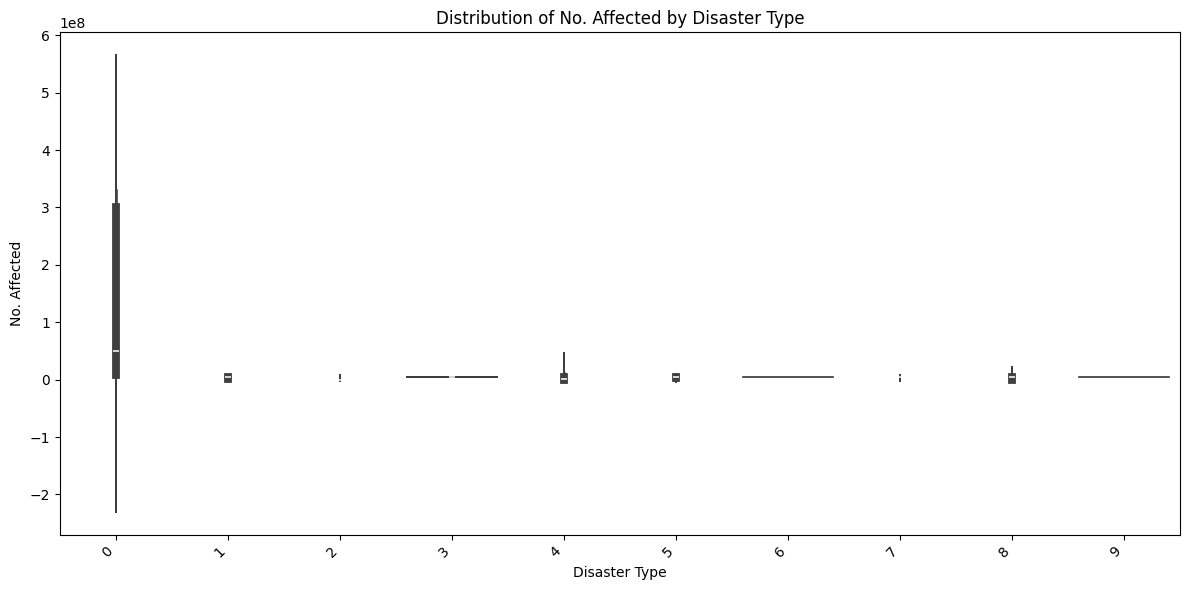

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

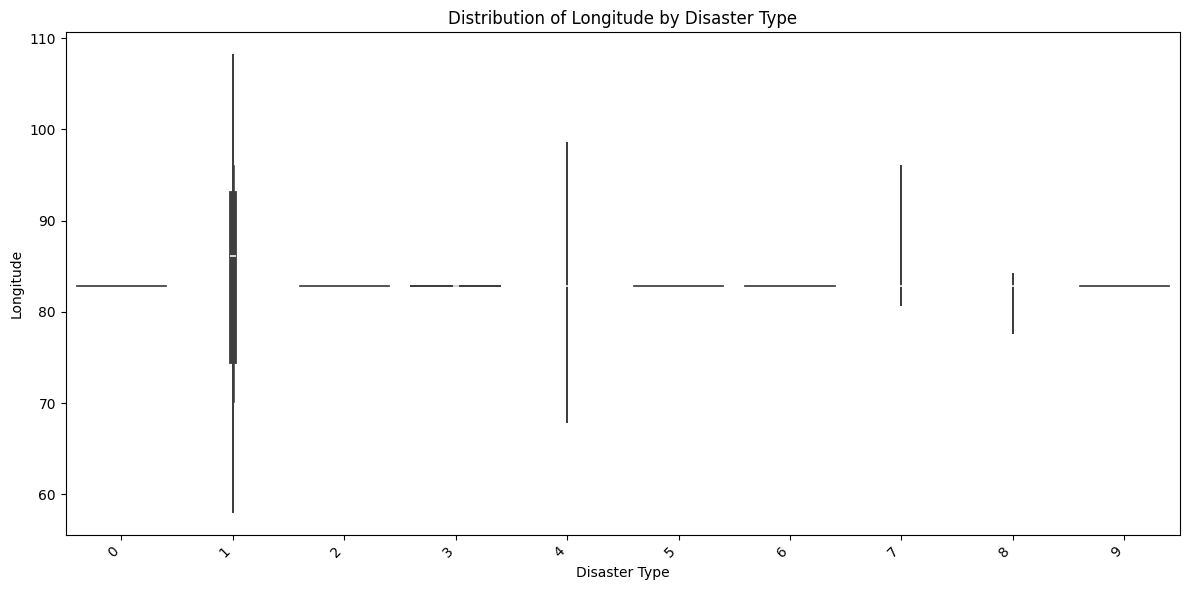

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

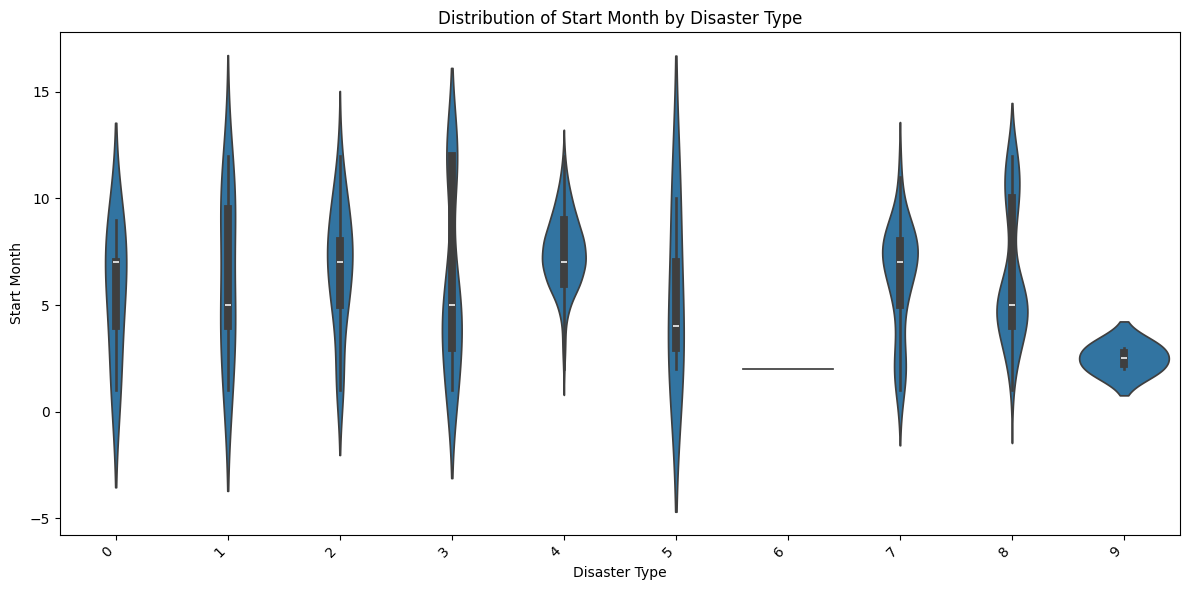

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

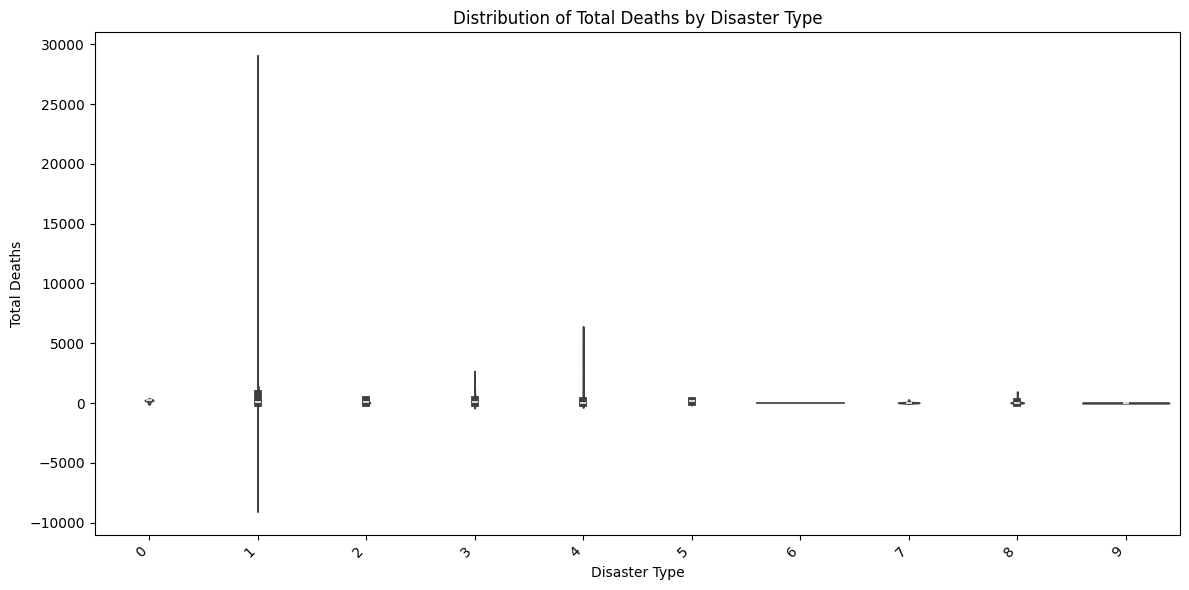

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

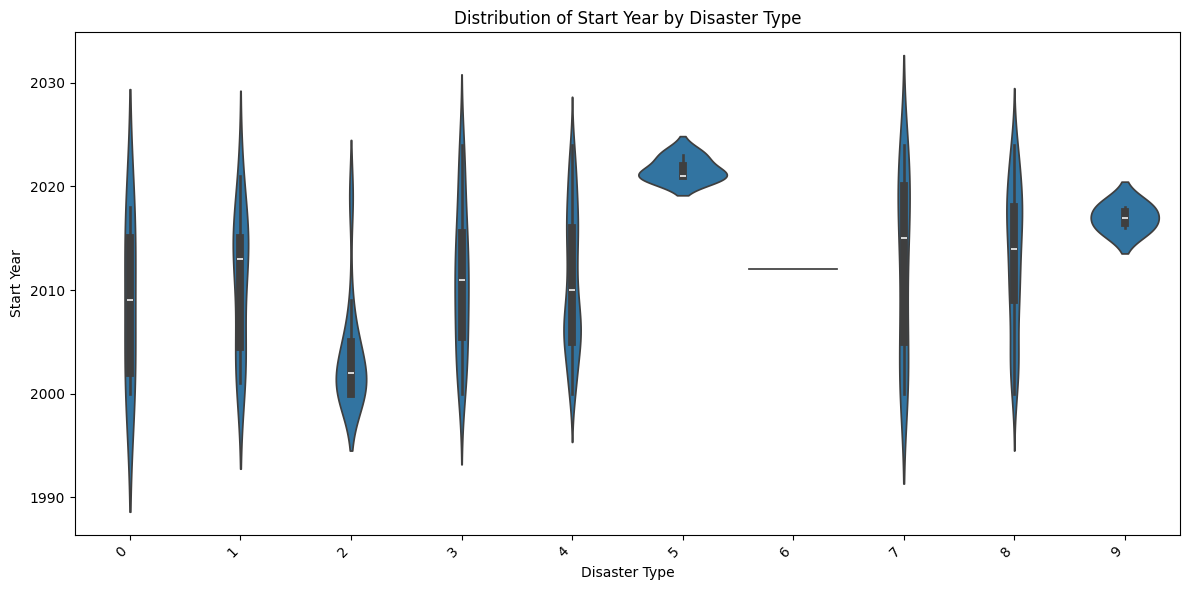

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

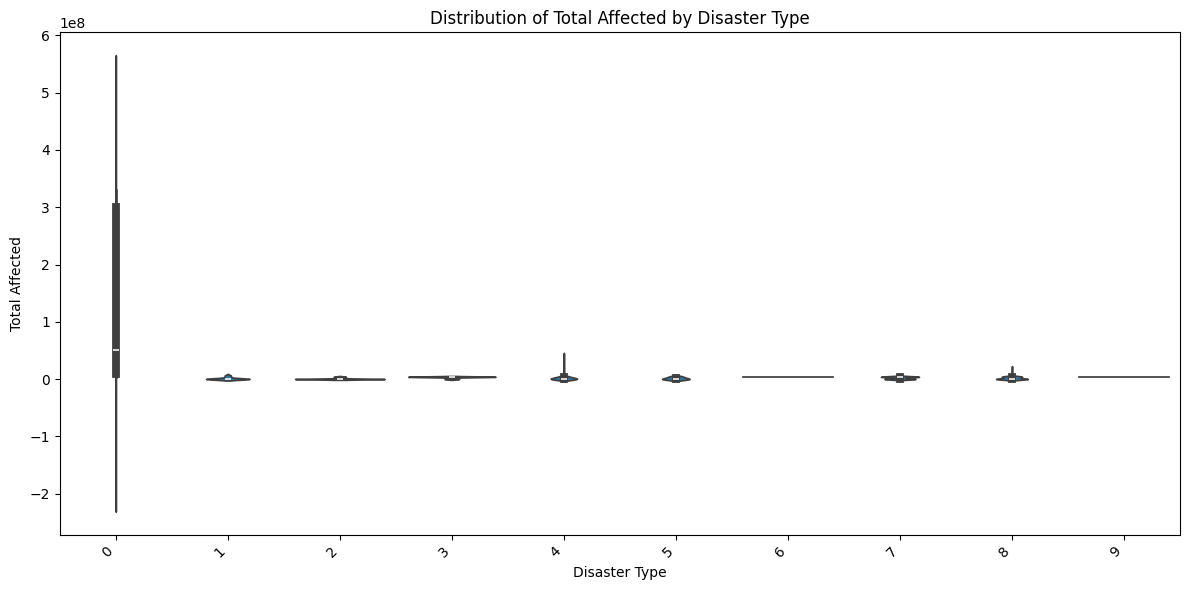

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

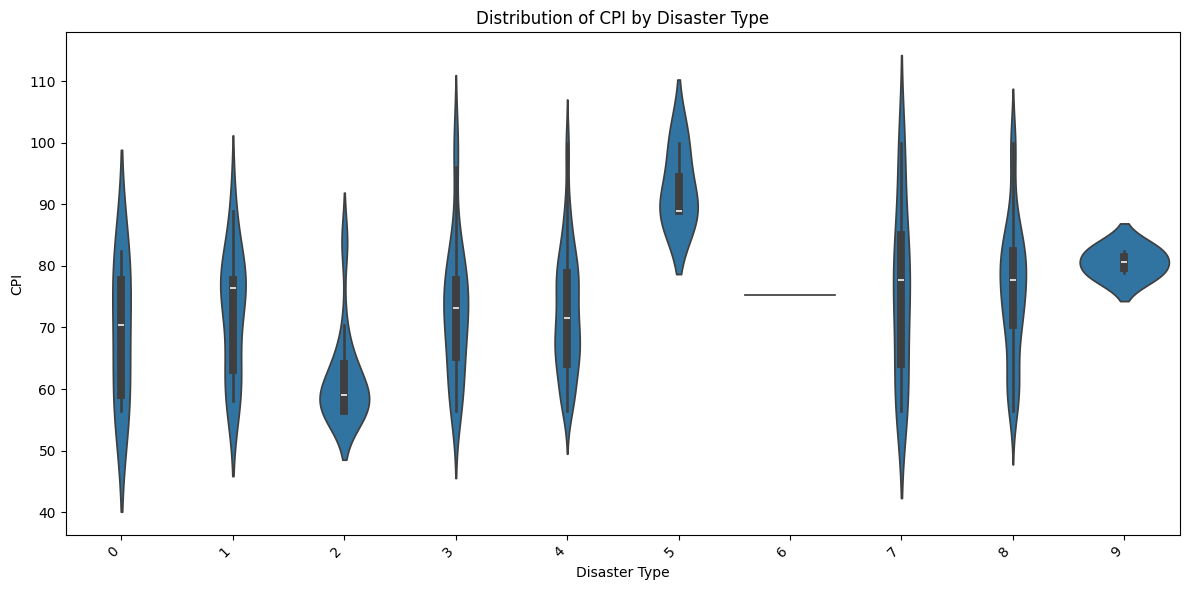

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

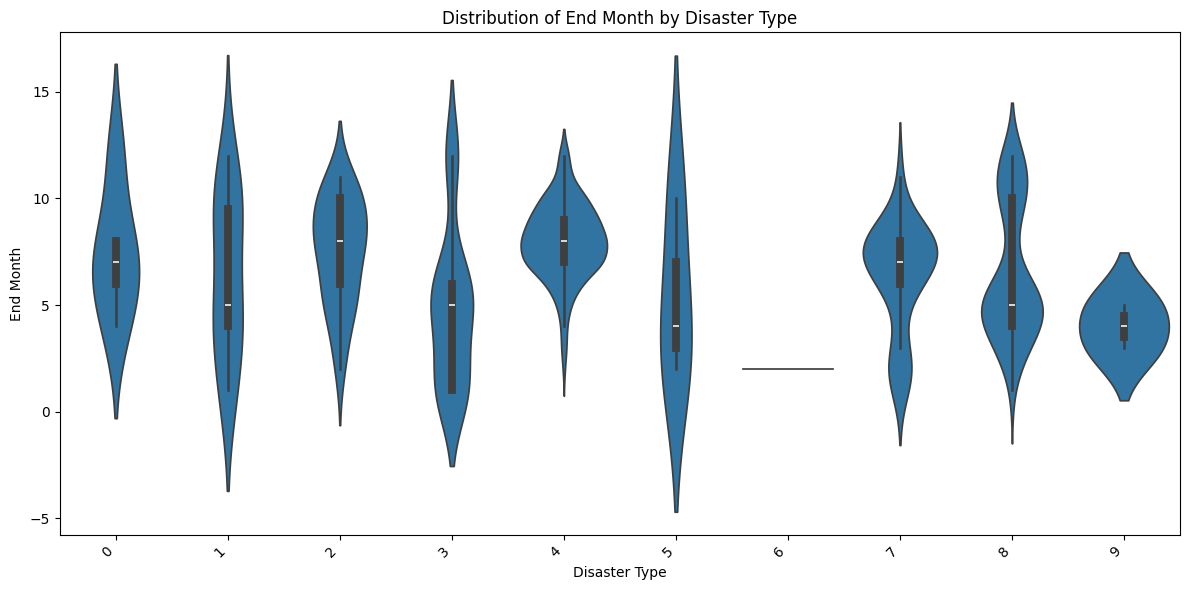

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

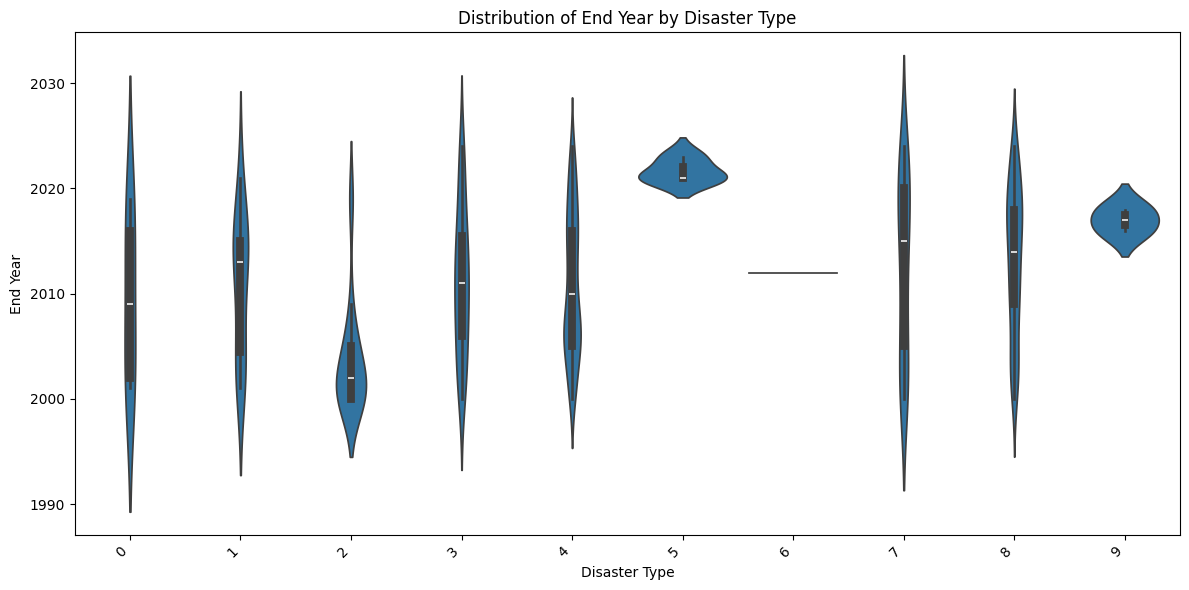

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

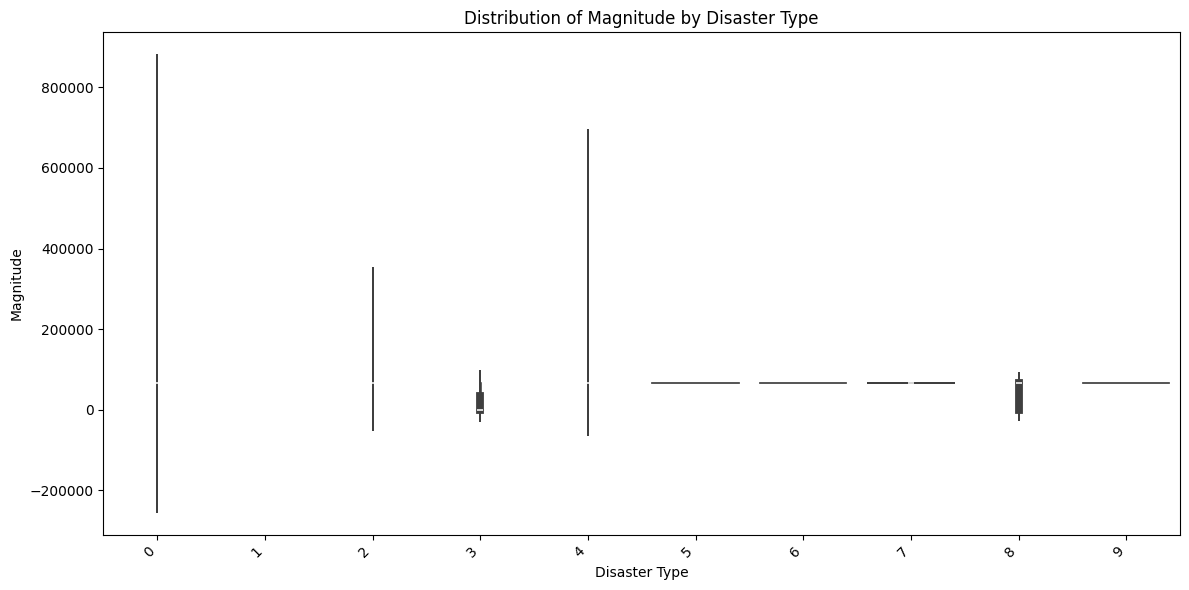

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

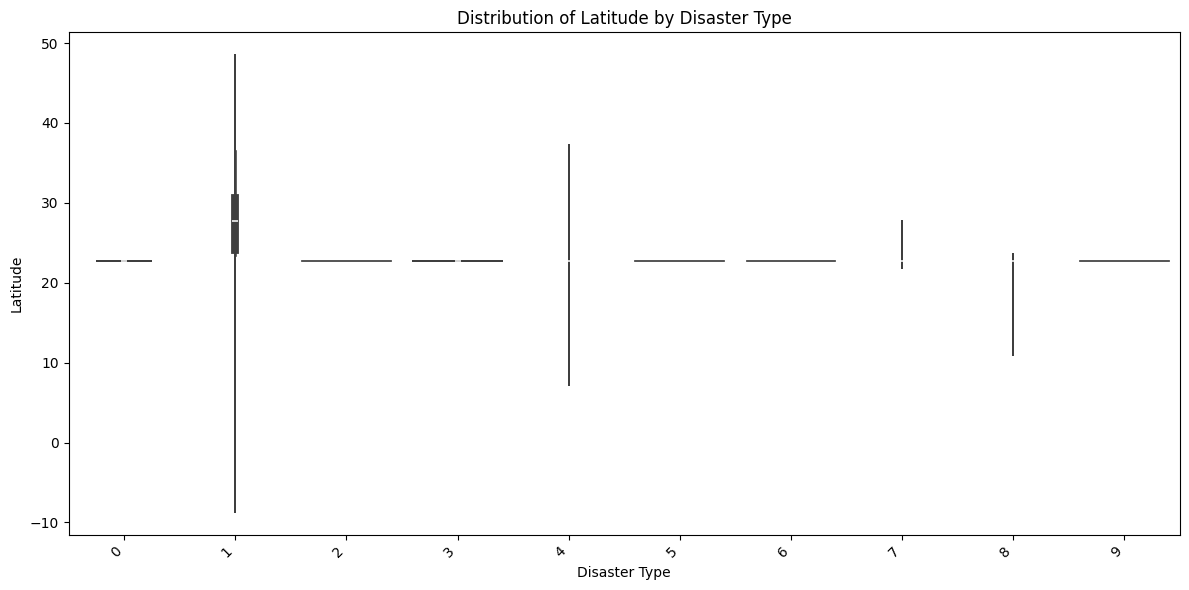

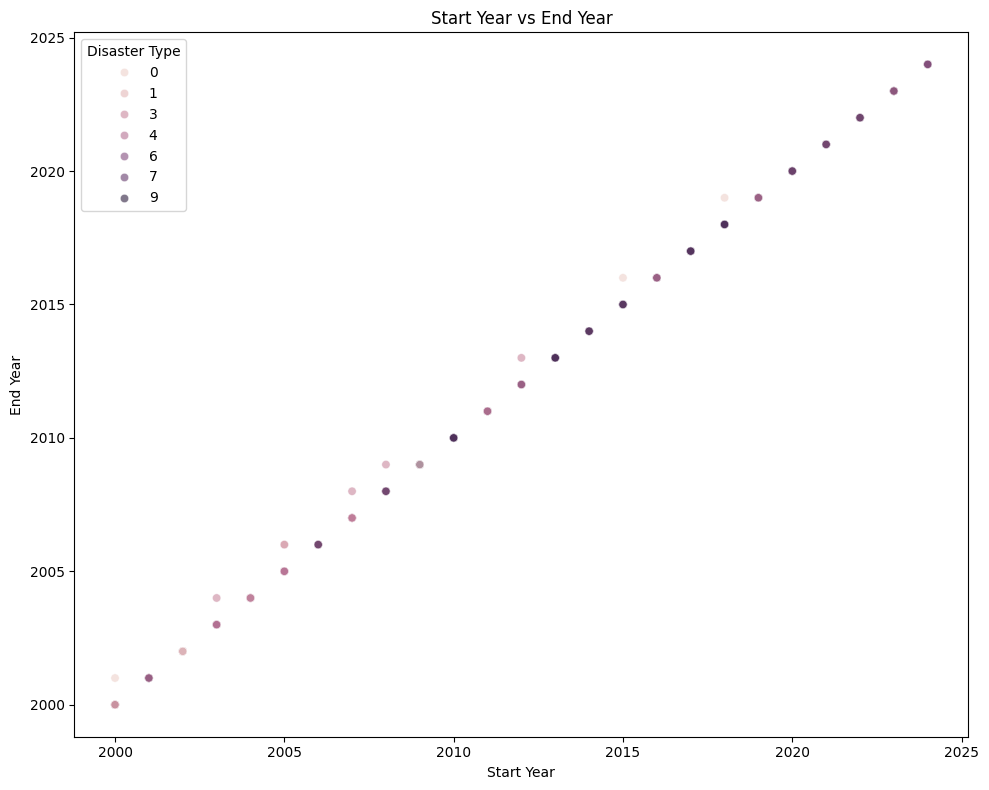

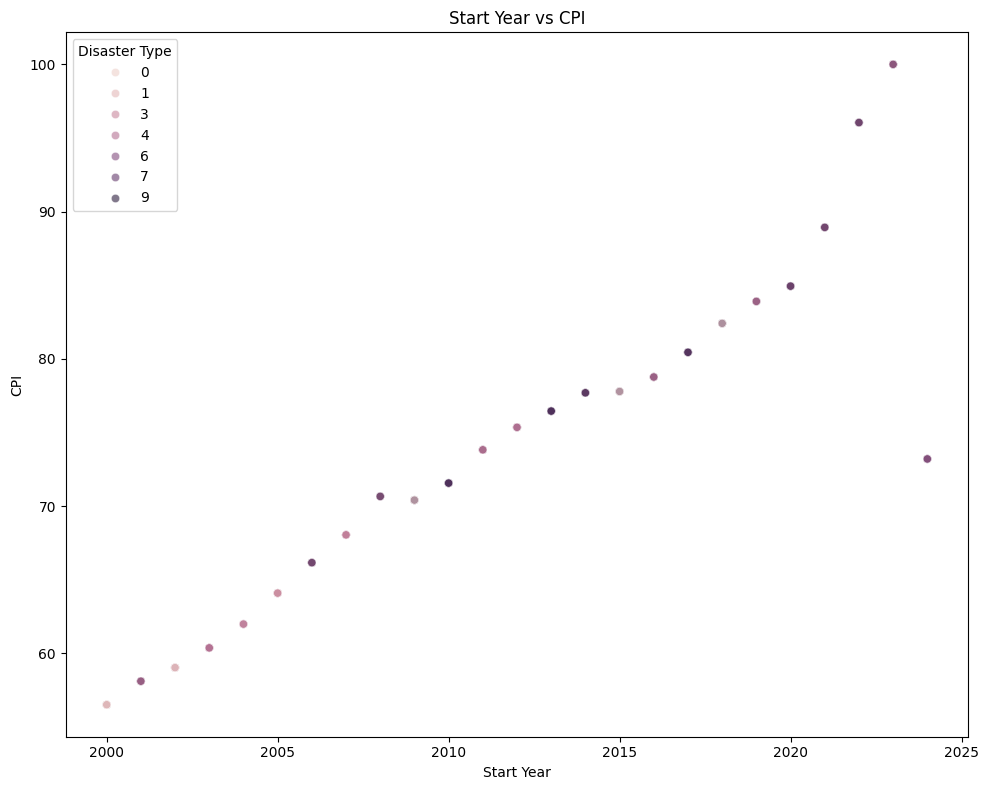

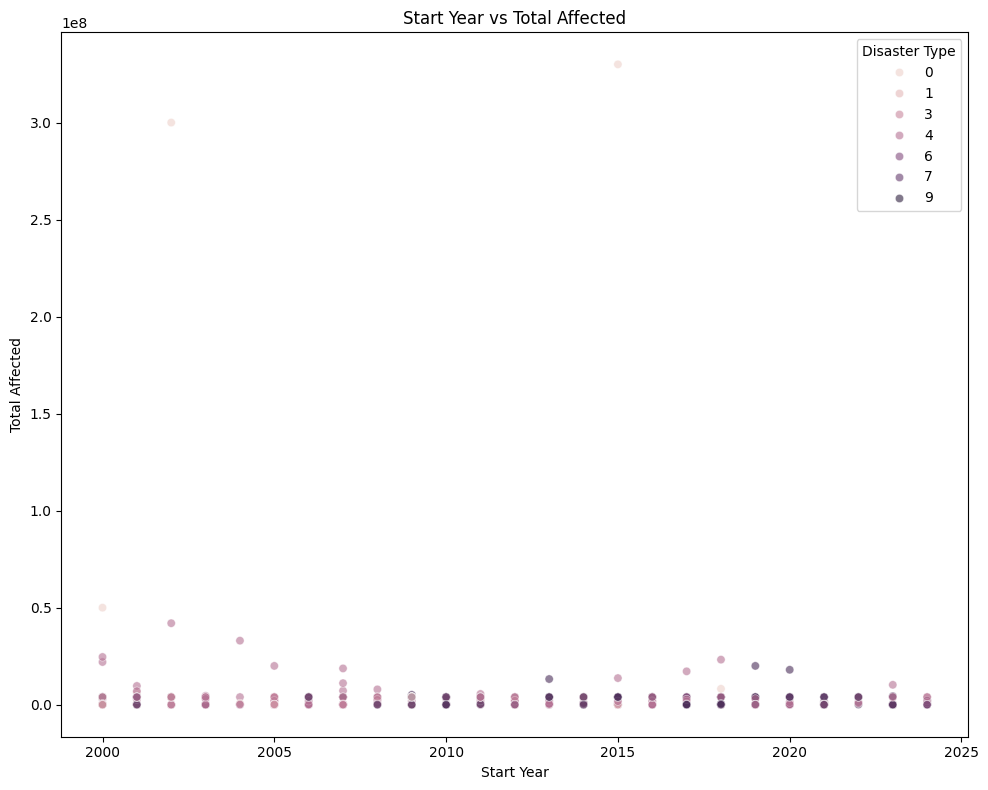

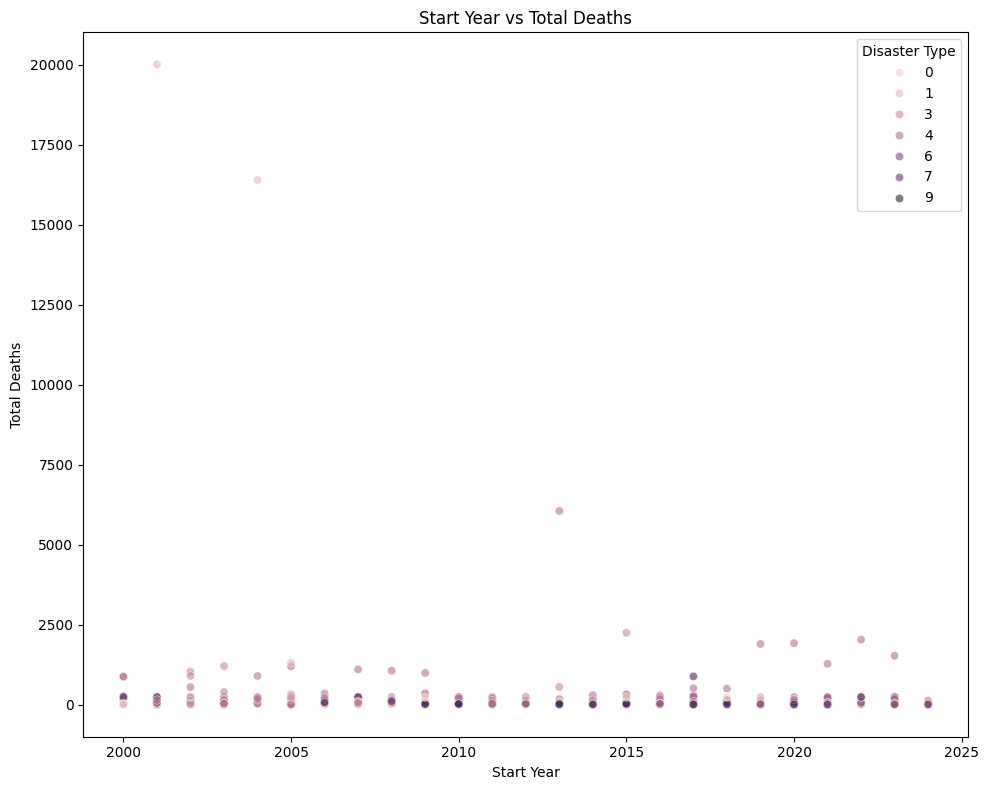

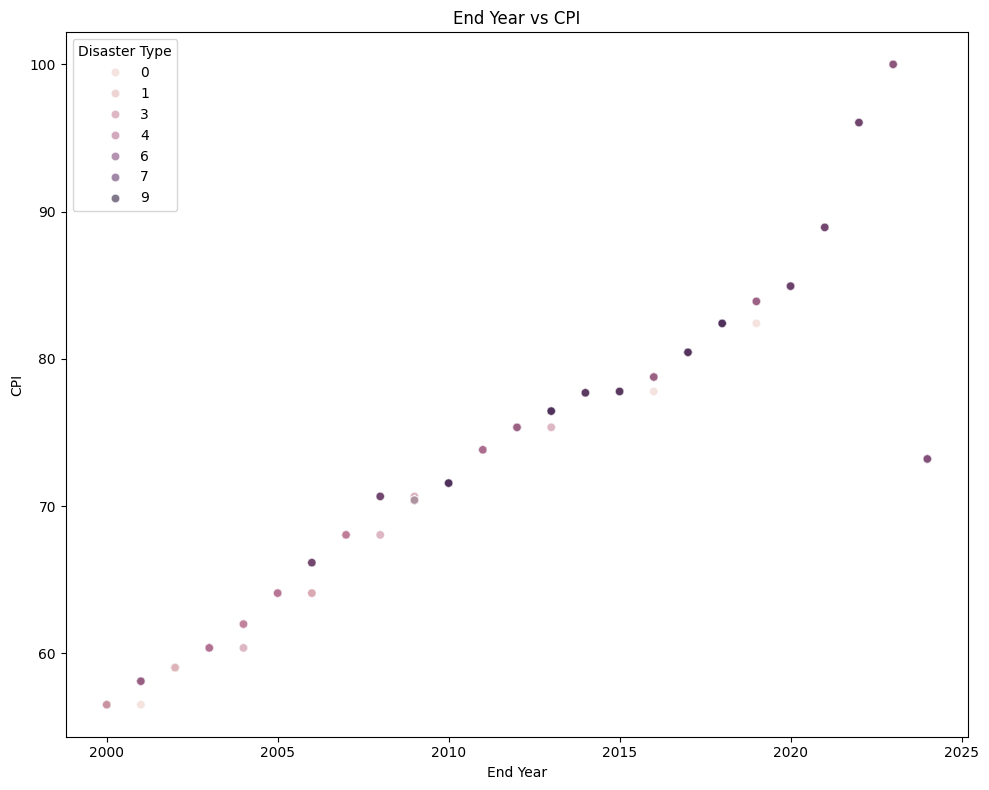

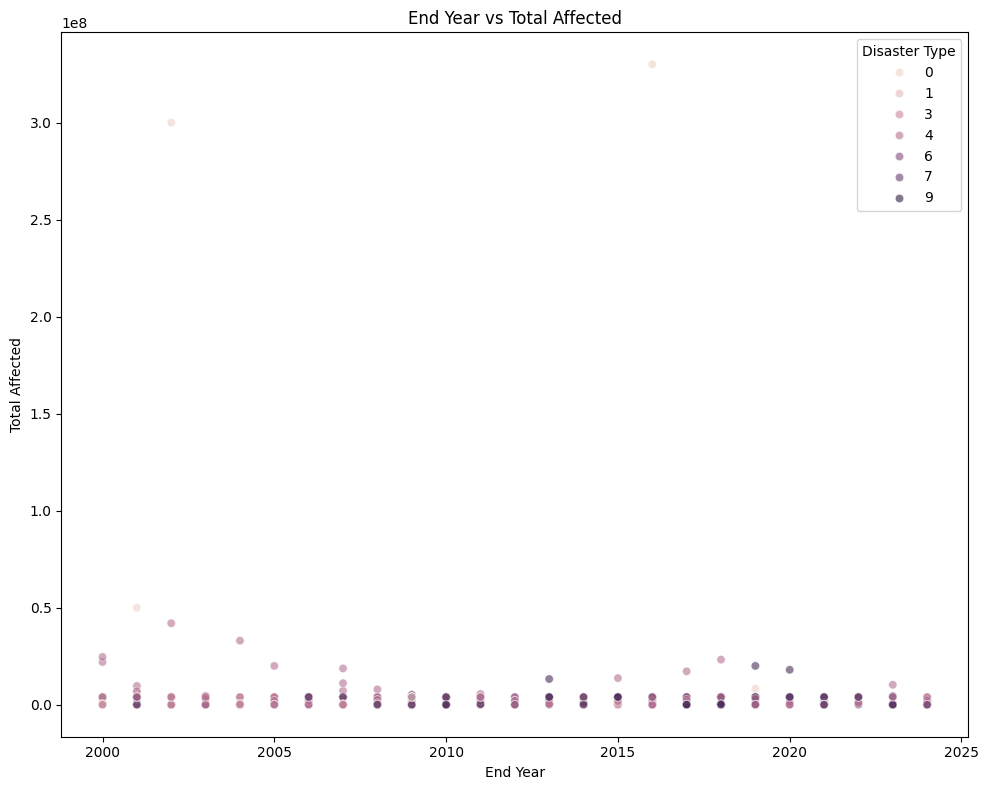

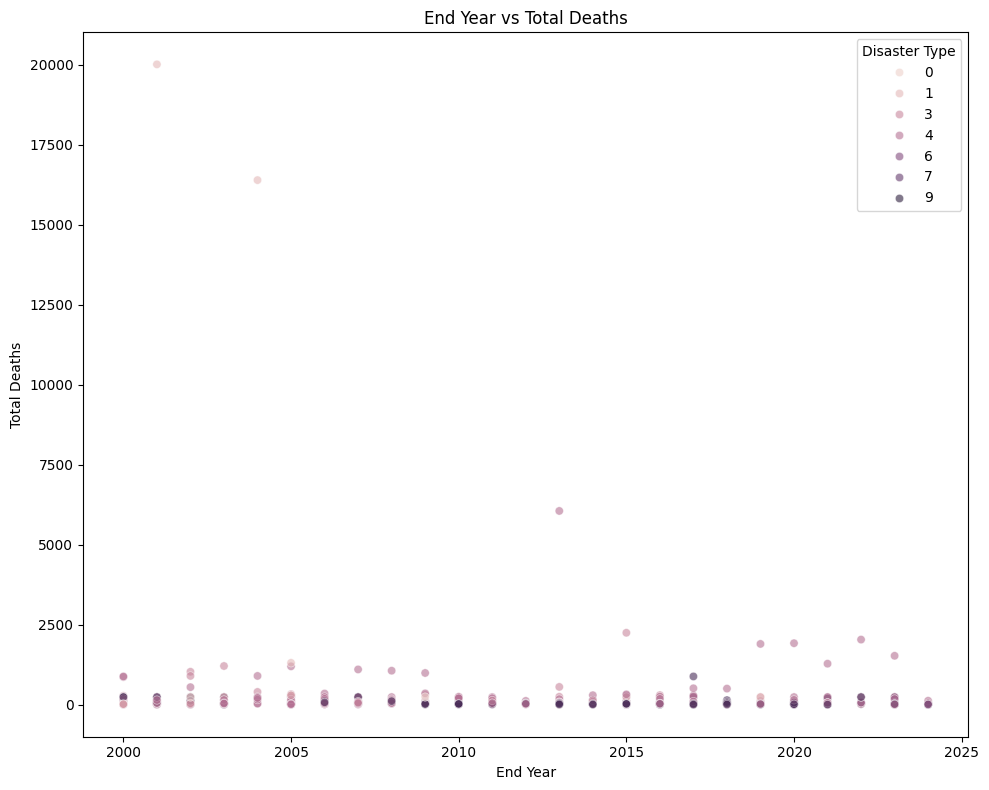

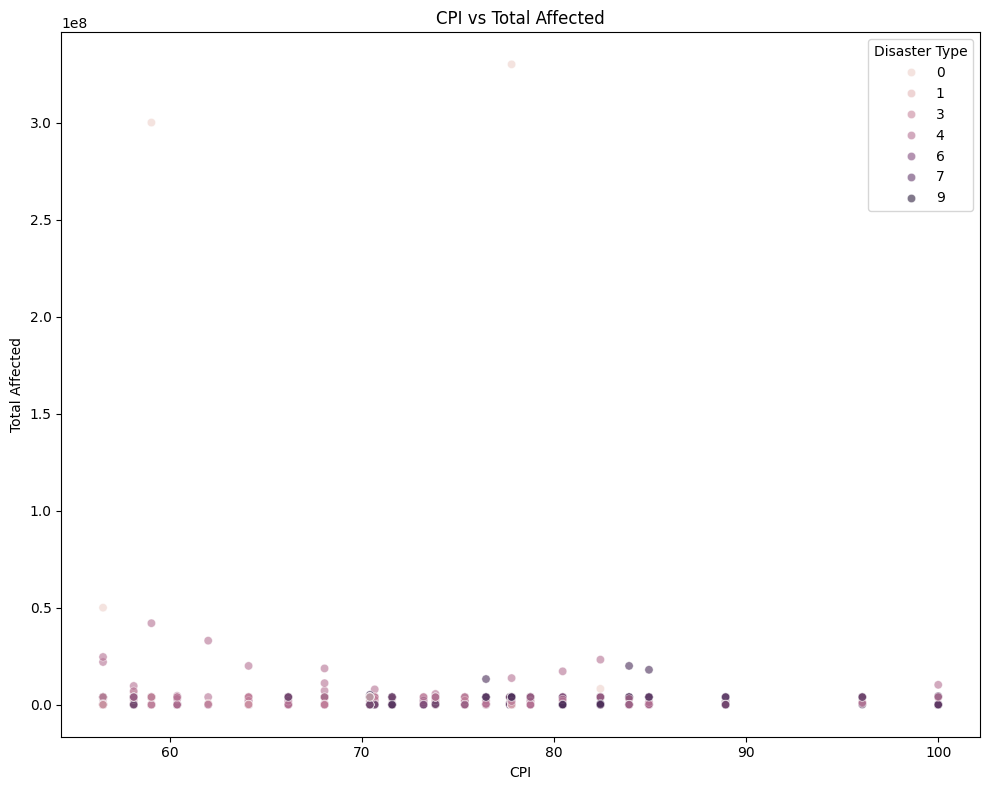

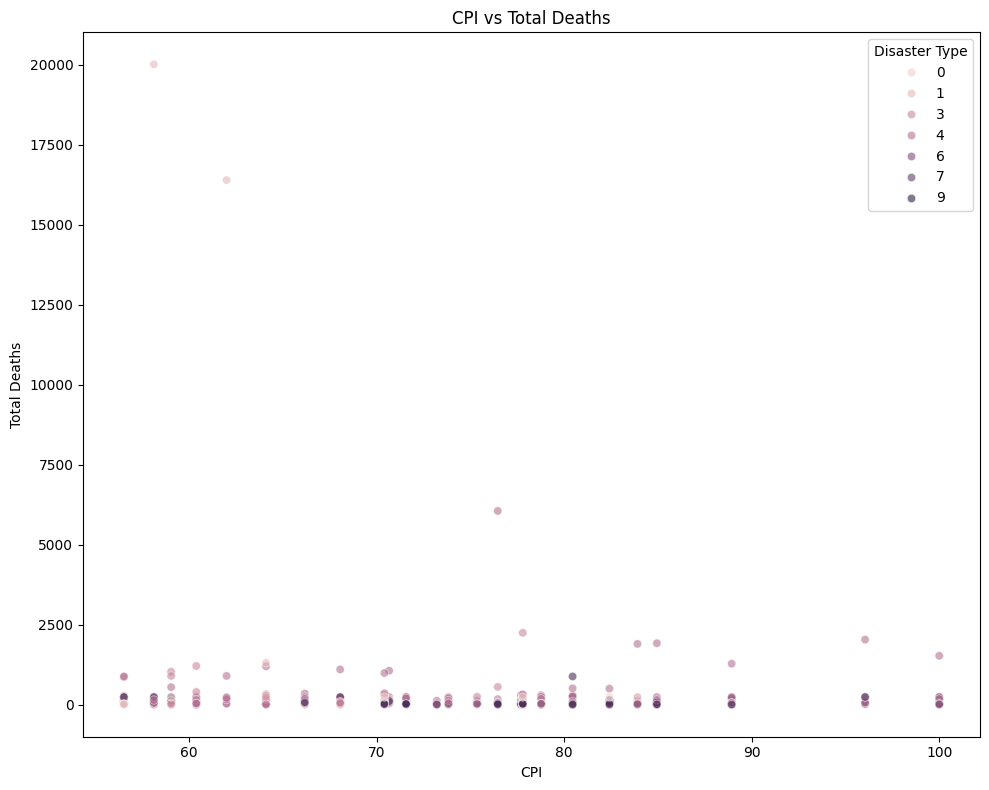

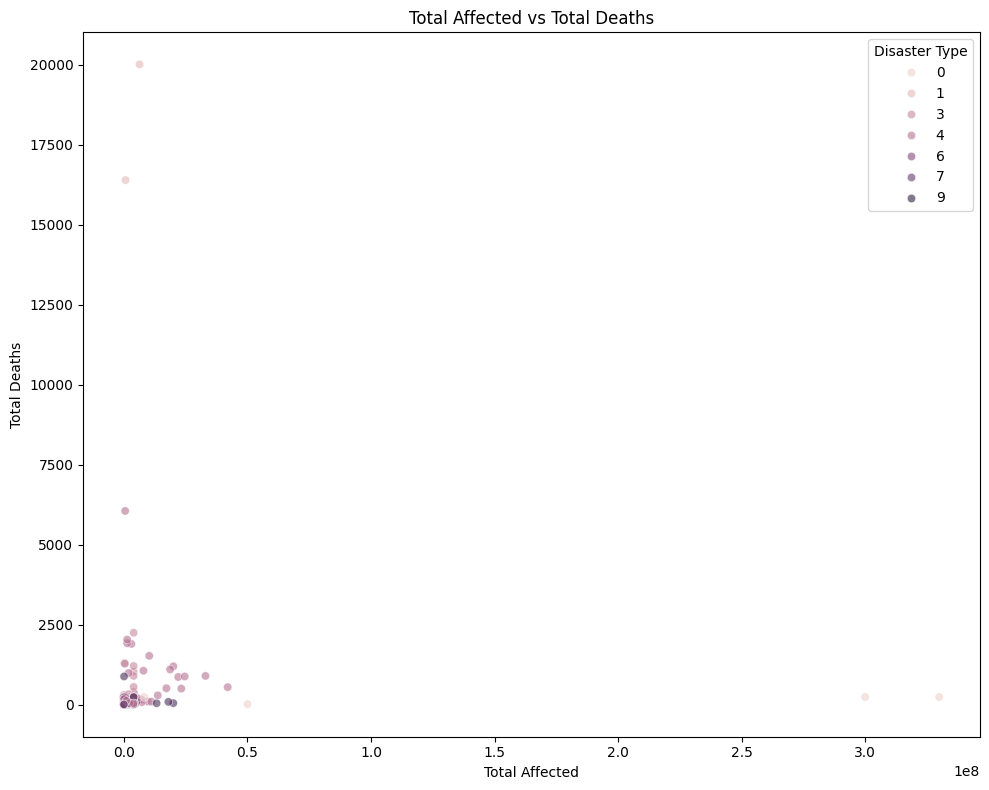

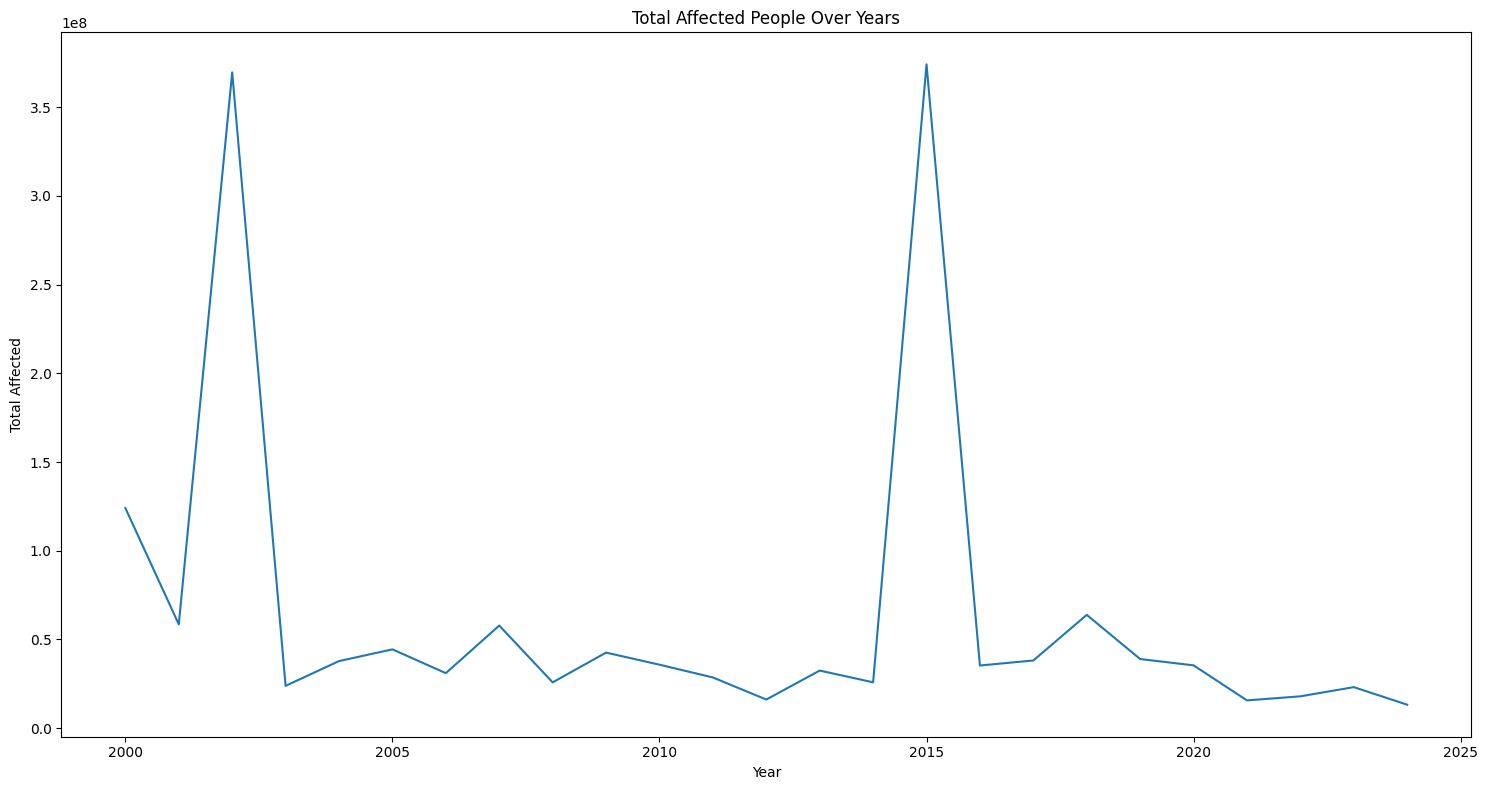

All visualizations have been displayed.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains the 'Disaster Type' column

# List of selected features
selected_features = ['No. Affected', 'Longitude', 'Start Month', 'Total Deaths', 'Start Year',
                     'Total Affected', 'CPI', 'End Month', 'End Year', 'Magnitude', 'Latitude']

# 1. Pair Plot
sns.pairplot(df[selected_features + ['Disaster Type']], hue='Disaster Type',
             plot_kws={'alpha': 0.6}, diag_kind='kde')
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()

# 3. Box Plots
for feature in selected_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Disaster Type', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Disaster Type')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 4. Violin Plots
for feature in selected_features:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Disaster Type', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Disaster Type')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 5. Scatter Plots (for top correlated features)
top_corr_features = ['Start Year', 'End Year', 'CPI', 'Total Affected', 'Total Deaths']
for i in range(len(top_corr_features)):
    for j in range(i+1, len(top_corr_features)):
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=top_corr_features[i], y=top_corr_features[j],
                        hue='Disaster Type', data=df, alpha=0.6)
        plt.title(f'{top_corr_features[i]} vs {top_corr_features[j]}')
        plt.tight_layout()
        plt.show()

# 6. Time Series Plot
plt.figure(figsize=(15, 8))
df.groupby('Start Year')['Total Affected'].sum().plot(kind='line')
plt.title('Total Affected People Over Years')
plt.xlabel('Year')
plt.ylabel('Total Affected')
plt.tight_layout()
plt.show()

print("All visualizations have been displayed.")

From here we can infer that 2015 is the most affected year.

In [15]:
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/FDS/2015.xlsx')
df1

,Date,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,...,End Year,End Month,End Day,Total Deaths,No. Affected,Total Affected,CPI,Admin Units,Entry Date,Last Update
0,1970-01-01,2015-0107-IND,No,nat-hyd-flo-fla,Natural,Hydrological,4,Flash flood,IND,India,...,2015,3,20,44.000000,5.141636e+06,2.122000e+03,77.786568,"[{""adm2_code"":72811,""adm2_name"":""Administrativ...",2015-04-01,2023-09-25
1,1970-01-01,2015-0118-IND,No,nat-met-sto-lig,Natural,Meteorological,8,Lightning/Thunderstorms,IND,India,...,2015,4,4,1.000000,1.000000e+04,1.000000e+04,77.786568,"[{""adm1_code"":1509,""adm1_name"":""Tripura""}]",2015-05-20,2023-09-25
2,1970-01-01,2015-0126-IND,No,nat-met-sto-lig,Natural,Meteorological,8,Lightning/Thunderstorms,IND,India,...,2015,3,6,27.000000,5.141636e+06,3.935890e+06,77.786568,"[{""adm1_code"":1491,""adm1_name"":""Gujarat""},{""ad...",2015-04-09,2023-09-25
3,1970-01-01,2015-0144-IND,No,nat-geo-ear-gro,Natural,Geophysical,1,Ground movement,IND,India,...,2015,4,25,78.000000,5.141636e+06,5.600000e+02,77.786568,"[{""adm1_code"":1507,""adm1_name"":""Sikkim""},{""adm...",2015-04-28,2023-09-25
4,1970-01-01,2015-0164-IND,No,nat-met-sto-sev,Natural,Meteorological,8,Severe weather,IND,India,...,2015,4,21,100.000000,1.250000e+05,1.251000e+05,77.786568,"[{""adm2_code"":17611,""adm2_name"":""Madhubani""},{...",2015-05-20,2023-09-25
5,1970-01-01,2015-0175-IND,No,nat-geo-ear-gro,Natural,Geophysical,1,Ground movement,IND,India,...,2015,5,12,20.000000,5.141636e+06,3.935890e+06,77.786568,"[{""adm1_code"":70073,""adm1_name"":""Bihar""}]",2015-05-21,2023-09-25
6,1970-01-01,2015-0189-IND,No,nat-met-ext-hea,Natural,Meteorological,3,Heat wave,IND,India,...,2015,5,20,2248.000000,5.141636e+06,3.935890e+06,77.786568,"[{""adm1_code"":1485,""adm1_name"":""Andhra Pradesh...",2015-06-01,2023-09-25
7,1970-01-01,2015-0207-IND,No,nat-hyd-flo-fla,Natural,Hydrological,4,Flash flood,IND,India,...,2015,5,17,8.000000,2.000000e+02,2.000000e+02,77.786568,"[{""adm2_code"":17869,""adm2_name"":""Virudhunagar""}]",2015-06-04,2023-09-25
8,1970-01-01,2015-0226-IND,No,nat-hyd-mmw-lan,Natural,Hydrological,7,Landslide (wet),IND,India,...,2015,6,2,3.000000,9.000000e+03,9.000000e+03,77.786568,"[{""adm2_code"":17576,""adm2_name"":""Barpeta""},{""a...",2015-07-15,2023-09-25
9,1970-01-01,2015-0249-IND,No,nat-hyd-flo-riv,Natural,Hydrological,4,Riverine flood,IND,India,...,2015,6,19,81.000000,9.000000e+03,9.000000e+03,77.786568,"[{""adm1_code"":1498,""adm1_name"":""Maharashtra""},...",2015-07-15,2023-09-25


In [16]:
# Ensure 'End Day', 'End Month', and 'End Year' are integers or valid strings
df1['End Day'] = df1['End Day'].astype(str).str.zfill(2)  # Ensures day is two digits
df1['End Month'] = df1['End Month'].astype(str).str.zfill(2)  # Ensures month is two digits
df1['End Year'] = df1['End Year'].astype(str)  # Ensure year is a string

# Combine the columns to form a date
df1['yearMonth'] = pd.to_datetime(df1['End Year'] + '-' + df1['End Month'] + '-' + df1['End Day'], errors='coerce')

# Set the new column as the index
df1.set_index('yearMonth', inplace=True)

# Display the first few rows of the DataFrame
df1.head()



,Date,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,...,End Year,End Month,End Day,Total Deaths,No. Affected,Total Affected,CPI,Admin Units,Entry Date,Last Update
yearMonth,,,,,,,,,,,,,,,,,,,,,
2015-03-20,1970-01-01,2015-0107-IND,No,nat-hyd-flo-fla,Natural,Hydrological,4,Flash flood,IND,India,...,2015,03,20,44.0,5.141636e+06,2.122000e+03,77.786568,"[{""adm2_code"":72811,""adm2_name"":""Administrativ...",2015-04-01,2023-09-25
2015-04-04,1970-01-01,2015-0118-IND,No,nat-met-sto-lig,Natural,Meteorological,8,Lightning/Thunderstorms,IND,India,...,2015,04,04,1.0,1.000000e+04,1.000000e+04,77.786568,"[{""adm1_code"":1509,""adm1_name"":""Tripura""}]",2015-05-20,2023-09-25
2015-03-06,1970-01-01,2015-0126-IND,No,nat-met-sto-lig,Natural,Meteorological,8,Lightning/Thunderstorms,IND,India,...,2015,03,06,27.0,5.141636e+06,3.935890e+06,77.786568,"[{""adm1_code"":1491,""adm1_name"":""Gujarat""},{""ad...",2015-04-09,2023-09-25
2015-04-25,1970-01-01,2015-0144-IND,No,nat-geo-ear-gro,Natural,Geophysical,1,Ground movement,IND,India,...,2015,04,25,78.0,5.141636e+06,5.600000e+02,77.786568,"[{""adm1_code"":1507,""adm1_name"":""Sikkim""},{""adm...",2015-04-28,2023-09-25
2015-04-21,1970-01-01,2015-0164-IND,No,nat-met-sto-sev,Natural,Meteorological,8,Severe weather,IND,India,...,2015,04,21,100.0,1.250000e+05,1.251000e+05,77.786568,"[{""adm2_code"":17611,""adm2_name"":""Madhubani""},{...",2015-05-20,2023-09-25


In [17]:
# Drop the 'Date' column
df1.drop(columns='Date', inplace=True)

# Display the first few rows of the DataFrame to confirm the change
df1.head()


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,...,End Year,End Month,End Day,Total Deaths,No. Affected,Total Affected,CPI,Admin Units,Entry Date,Last Update
yearMonth,,,,,,,,,,,,,,,,,,,,,
2015-03-20,2015-0107-IND,No,nat-hyd-flo-fla,Natural,Hydrological,4,Flash flood,IND,India,Southern Asia,...,2015,03,20,44.0,5.141636e+06,2.122000e+03,77.786568,"[{""adm2_code"":72811,""adm2_name"":""Administrativ...",2015-04-01,2023-09-25
2015-04-04,2015-0118-IND,No,nat-met-sto-lig,Natural,Meteorological,8,Lightning/Thunderstorms,IND,India,Southern Asia,...,2015,04,04,1.0,1.000000e+04,1.000000e+04,77.786568,"[{""adm1_code"":1509,""adm1_name"":""Tripura""}]",2015-05-20,2023-09-25
2015-03-06,2015-0126-IND,No,nat-met-sto-lig,Natural,Meteorological,8,Lightning/Thunderstorms,IND,India,Southern Asia,...,2015,03,06,27.0,5.141636e+06,3.935890e+06,77.786568,"[{""adm1_code"":1491,""adm1_name"":""Gujarat""},{""ad...",2015-04-09,2023-09-25
2015-04-25,2015-0144-IND,No,nat-geo-ear-gro,Natural,Geophysical,1,Ground movement,IND,India,Southern Asia,...,2015,04,25,78.0,5.141636e+06,5.600000e+02,77.786568,"[{""adm1_code"":1507,""adm1_name"":""Sikkim""},{""adm...",2015-04-28,2023-09-25
2015-04-21,2015-0164-IND,No,nat-met-sto-sev,Natural,Meteorological,8,Severe weather,IND,India,Southern Asia,...,2015,04,21,100.0,1.250000e+05,1.251000e+05,77.786568,"[{""adm2_code"":17611,""adm2_name"":""Madhubani""},{...",2015-05-20,2023-09-25


In [18]:

# Split the dataset into training and test sets (80% training, 20% testing)
train_size = int(len(df1) * 0.8)
train, test = df1[:train_size], df1[train_size:]

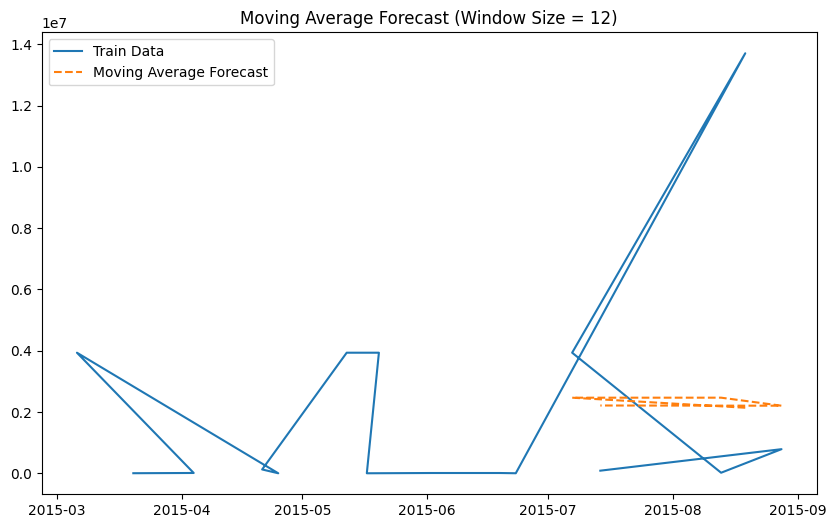

In [19]:
# 1. Moving Average Model
def moving_average_forecast(data, window_size):
    return data.rolling(window=window_size).mean()

# Using a window size of 12 (monthly rolling average for daily data)
moving_avg_forecast = moving_average_forecast(train['Total Affected'], window_size=12).dropna()

# Plot the results for Moving Average
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Total Affected'], label='Train Data')
plt.plot(moving_avg_forecast.index, moving_avg_forecast, label='Moving Average Forecast', linestyle='--')
plt.title("Moving Average Forecast (Window Size = 12)")
plt.legend()
plt.show()


In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is av

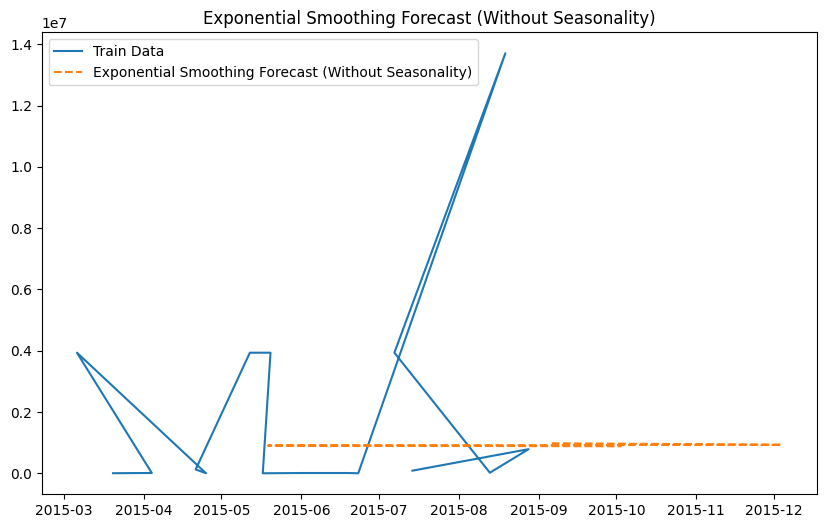

Exponential Smoothing - MAPE: 19084.099769226283, RMSE: 2405338.32352726


In [21]:
# Import required libraries
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Assuming df1 has already been prepared and split into train and test
# 2. Exponential Smoothing Model
exp_smoothing_model = ExponentialSmoothing(train['Total Affected'], trend='add').fit()
exp_smoothing_forecast = exp_smoothing_model.forecast(len(test))

# Plot Exponential Smoothing forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Total Affected'], label='Train Data')
plt.plot(test.index, exp_smoothing_forecast, label='Exponential Smoothing Forecast (Without Seasonality)', linestyle='--')
plt.title("Exponential Smoothing Forecast (Without Seasonality)")
plt.legend()
plt.show()

# Calculate MAPE and RMSE for Exponential Smoothing
mape_exp_smoothing = mean_absolute_percentage_error(test['Total Affected'], exp_smoothing_forecast)
rmse_exp_smoothing = np.sqrt(mean_squared_error(test['Total Affected'], exp_smoothing_forecast))

print(f"Exponential Smoothing - MAPE: {mape_exp_smoothing}, RMSE: {rmse_exp_smoothing}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

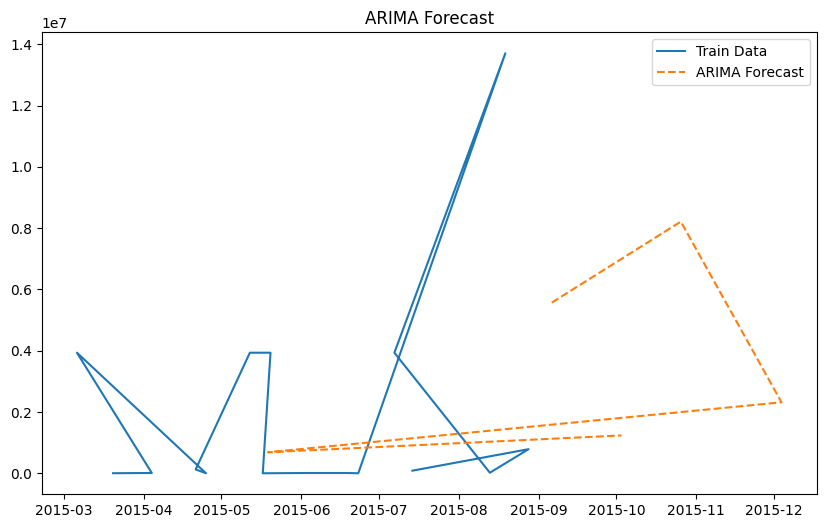

ARIMA - MAPE: 164294.252175401, RMSE: 4201878.906132625


In [22]:
# Import required libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# 3. ARIMA Model
arima_model = ARIMA(train['Total Affected'], order=(5,1,0)).fit()
arima_forecast = arima_model.forecast(len(test))

# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Total Affected'], label='Train Data')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()

# Calculate MAPE and RMSE for ARIMA
mape_arima = mean_absolute_percentage_error(test['Total Affected'], arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test['Total Affected'], arima_forecast))

print(f"ARIMA - MAPE: {mape_arima}, RMSE: {rmse_arima}")


In [23]:
# Compare the accuracy metrics of both models
results = {
    'Exponential Smoothing': {'MAPE': mape_exp_smoothing, 'RMSE': rmse_exp_smoothing},
    'ARIMA': {'MAPE': mape_arima, 'RMSE': rmse_arima}
}

print("Accuracy Metrics for Exponential Smoothing and ARIMA:")
print(results)


Accuracy Metrics for Exponential Smoothing and ARIMA:
{'Exponential Smoothing': {'MAPE': 19084.099769226283, 'RMSE': 2405338.32352726}, 'ARIMA': {'MAPE': 164294.252175401, 'RMSE': 4201878.906132625}}
